In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.metrics import make_scorer, auc, roc_curve
import multiprocessing
from keras.callbacks import Callback
import keras.backend as K
from IPython.core.pylabtools import figsize

from utils import exctract_data, DataFrameSelector

In [204]:
exctract_data()

[Errno 17] File exists: '/home/lee/churn/datasets'


In [205]:
train_data = 'datasets/bank_data_train.csv'
df = pd.read_csv(train_data)
df.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [206]:
df.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,316867.000000,155163.0,60550.000000,155163.0,155163.0,355190.000000,77112.000000,77112.000000,...,355190.000000,95713.000000,93448.000000,98175.000000,95713.000000,355190.000000,93448.000000,93448.000000,93448.000000,355190.000000
mean,368794.674875,0.105225,0.044045,0.0,50.947498,0.0,0.0,0.001305,0.416896,0.414572,...,0.007309,0.055074,0.025707,0.049943,0.009252,0.004309,0.013938,0.013938,0.013938,0.081435
std,128148.804566,0.431372,0.108449,0.0,21.777855,0.0,0.0,0.029118,0.316493,0.338612,...,0.066681,0.215909,0.115732,0.185830,0.092789,0.059852,0.097099,0.097099,0.097099,0.273503
min,146841.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257846.250000,0.000000,0.000000,0.0,33.000000,0.0,0.0,0.000000,0.166667,0.139645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368778.500000,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,479737.750000,0.000000,0.036608,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.661195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590828.000000,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 314.3+ MB


In [208]:
na_stat = df.isna().sum()
na_stat

ID                               0
CR_PROD_CNT_IL                   0
AMOUNT_RUB_CLO_PRC           38323
PRC_ACCEPTS_A_EMAIL_LINK    200027
APP_REGISTR_RGN_CODE        294640
                             ...  
TURNOVER_DYNAMIC_CC_3M           0
LDEAL_ACT_DAYS_PCT_TR       261742
LDEAL_ACT_DAYS_PCT_TR4      261742
LDEAL_ACT_DAYS_PCT_CURR     261742
TARGET                           0
Length: 116, dtype: int64

In [209]:
amount = df.shape[0]
threshold_to_delete = 0.4 * amount
del_cols = [index for index in na_stat.index if na_stat[index] >= threshold_to_delete]
del_cols.append('ID')
len(del_cols)

71

In [210]:
df_ = df.drop(del_cols, axis=1)
df_

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
0,0,0.000000,0.0,0.000000,0.0,0.541683,0,156067.339767,0.000000,0.000000,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
1,0,0.041033,0.0,0.244678,0.0,0.000000,0,4278.845817,0.000000,0.454545,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
2,0,0.006915,0.0,0.000000,0.0,0.000000,0,112837.062817,0.000000,0.000000,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
3,0,0.000000,0.0,0.000000,0.0,0.005874,0,42902.902883,0.000000,0.000000,...,1.583333,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0
4,0,0.000000,0.0,0.000000,0.0,0.000000,0,71906.476533,0.000000,0.000000,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,0,0.000000,0.0,0.000000,0.0,0.000000,0,9697.620867,0.000000,0.000000,...,8.963872,0.0,0.0,0.659039,0.785714,0.0,0.0,0.0,0.0,0
355186,0,0.000000,0.0,0.000000,0.0,0.000000,0,428380.024733,0.262714,0.000000,...,8.963872,0.0,0.0,0.652612,0.500000,0.0,0.0,0.0,0.0,0
355187,0,0.041298,0.0,0.095187,0.0,0.000000,0,224884.436700,0.031179,0.211488,...,8.966560,0.0,0.0,0.448386,0.459530,0.0,0.0,0.0,0.0,0
355188,0,0.000000,0.0,0.000000,0.0,0.000000,0,12080.001833,0.282573,0.000000,...,8.966560,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0


In [211]:
df_.describe()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
count,355190.000000,316867.000000,355190.000000,316867.000000,355190.000000,355190.000000,355190.000000,3.551900e+05,316867.000000,316867.000000,...,355190.000000,355190.000000,355190.000000,303194.000000,303194.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000
mean,0.105225,0.044045,0.001305,0.085249,0.000723,0.063400,0.031214,6.635854e+04,0.023971,0.191057,...,4.377001,0.071906,0.025108,0.582237,0.597247,0.002191,0.000883,0.007309,0.004309,0.081435
std,0.431372,0.108449,0.029118,0.142310,0.014081,0.202963,0.184059,1.878598e+05,0.090774,0.195820,...,2.936530,0.206863,0.104482,0.282157,0.247131,0.026360,0.027321,0.066681,0.059852,0.273503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.345592,0.000000,0.000000,0.000000,0.005747,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.070440e+03,0.000000,0.000000,...,1.781187,0.000000,0.000000,0.383673,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.027117,0.000000,0.000000,0.000000,1.628925e+04,0.000000,0.147059,...,3.894098,0.000000,0.000000,0.552169,0.558824,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.036608,0.000000,0.110005,0.000000,0.000000,0.000000,5.659516e+04,0.010536,0.310345,...,6.555388,0.000000,0.000000,0.820226,0.766225,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.202141e+07,1.000000,1.000000,...,13.748937,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CR_PROD_CNT_IL            355190 non-null  int64  
 1   AMOUNT_RUB_CLO_PRC        316867 non-null  float64
 2   TURNOVER_DYNAMIC_IL_1M    355190 non-null  float64
 3   AMOUNT_RUB_SUP_PRC        316867 non-null  float64
 4   REST_DYNAMIC_FDEP_1M      355190 non-null  float64
 5   REST_DYNAMIC_SAVE_3M      355190 non-null  float64
 6   CR_PROD_CNT_VCU           355190 non-null  int64  
 7   REST_AVG_CUR              355190 non-null  float64
 8   AMOUNT_RUB_NAS_PRC        316867 non-null  float64
 9   TRANS_COUNT_SUP_PRC       316867 non-null  float64
 10  TRANS_COUNT_NAS_PRC       316867 non-null  float64
 11  CR_PROD_CNT_TOVR          355190 non-null  int64  
 12  CR_PROD_CNT_PIL           355190 non-null  int64  
 13  TURNOVER_CC               355190 non-null  f

In [213]:
df_.duplicated().sum()

131

In [214]:
df_ = df_.drop_duplicates()

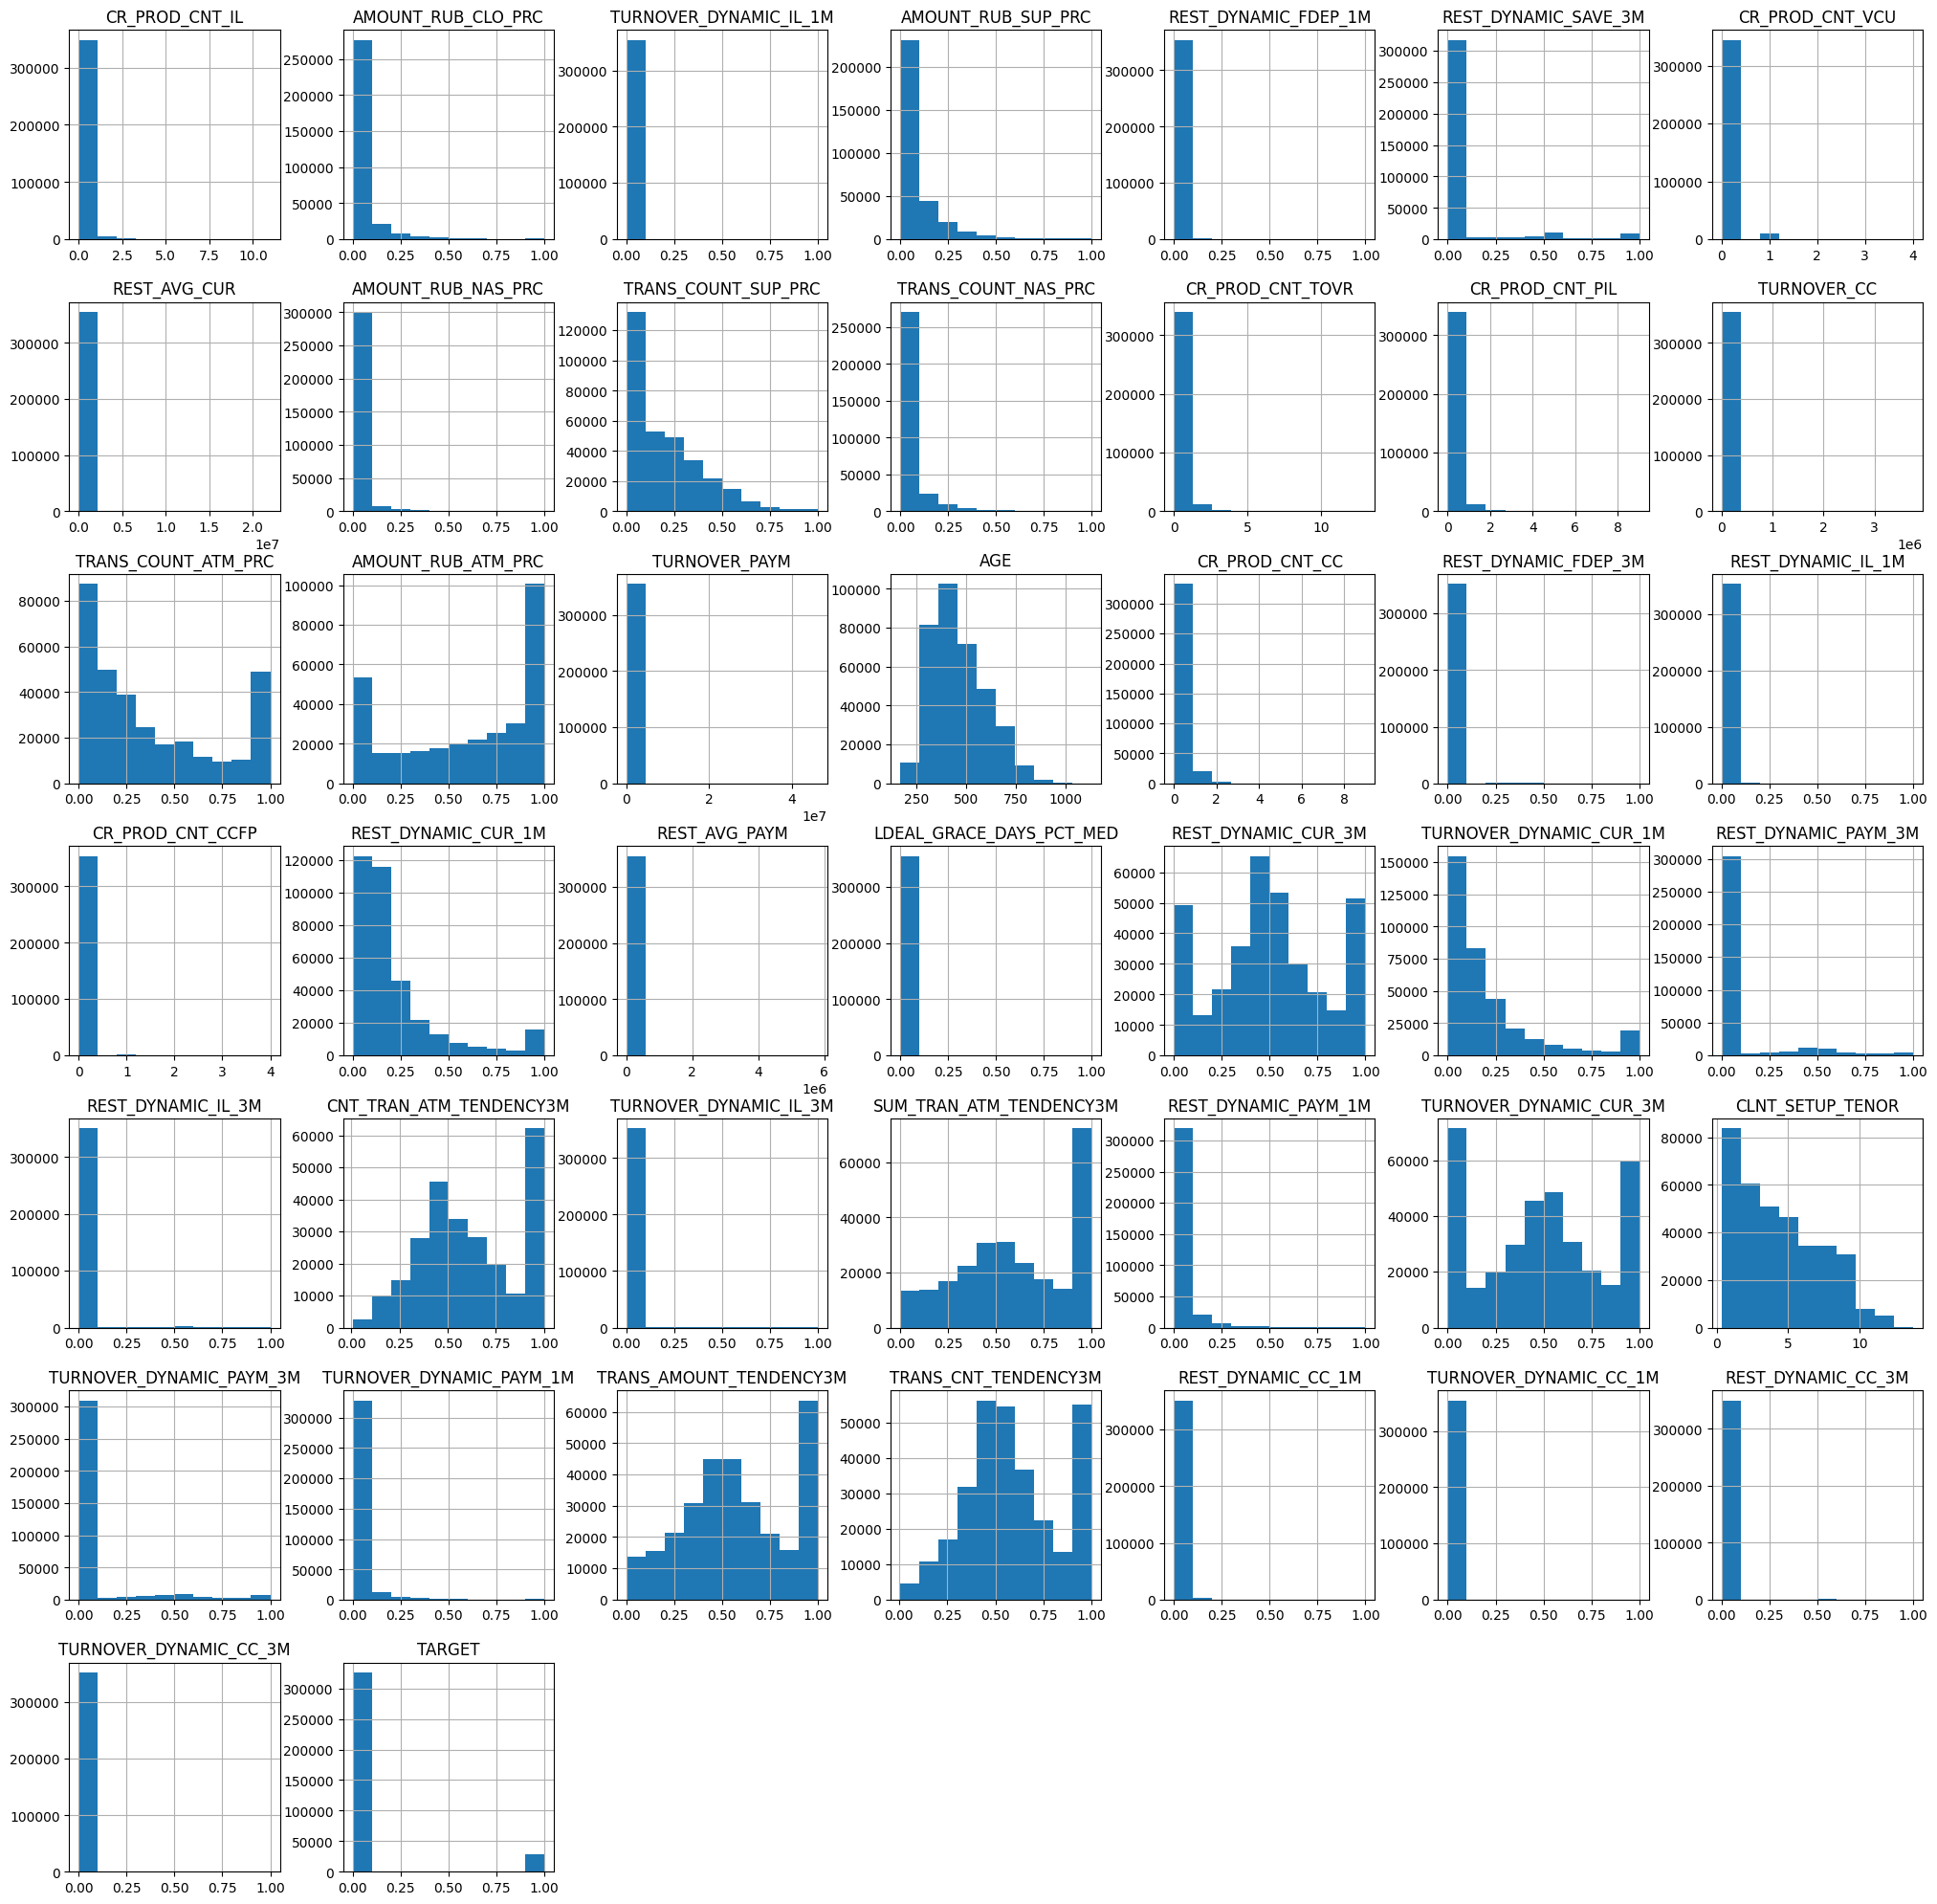

In [215]:
df_.hist(figsize=(25, 25))
None

In [216]:
df_.corr()['TARGET'].sort_values()

CLNT_SETUP_TENOR           -0.081627
REST_AVG_CUR               -0.075457
AMOUNT_RUB_CLO_PRC         -0.042953
AGE                        -0.041163
CR_PROD_CNT_TOVR           -0.027888
AMOUNT_RUB_SUP_PRC         -0.025675
TRANS_COUNT_SUP_PRC        -0.021331
REST_AVG_PAYM              -0.014788
CR_PROD_CNT_CC             -0.013239
AMOUNT_RUB_NAS_PRC         -0.011522
REST_DYNAMIC_CC_1M         -0.011469
REST_DYNAMIC_CC_3M         -0.010240
TRANS_COUNT_NAS_PRC        -0.009872
REST_DYNAMIC_CUR_3M        -0.007160
LDEAL_GRACE_DAYS_PCT_MED   -0.004088
TURNOVER_CC                -0.002947
REST_DYNAMIC_IL_3M          0.002216
REST_DYNAMIC_IL_1M          0.002259
TURNOVER_DYNAMIC_CC_3M      0.003470
TURNOVER_PAYM               0.004044
CR_PROD_CNT_VCU             0.004917
CR_PROD_CNT_CCFP            0.006864
TURNOVER_DYNAMIC_CC_1M      0.007926
CR_PROD_CNT_IL              0.013290
REST_DYNAMIC_SAVE_3M        0.014434
CR_PROD_CNT_PIL             0.015529
REST_DYNAMIC_CUR_1M         0.019470
T

In [217]:
labels = df_['TARGET']
data = df_.drop(['TARGET'], axis=1)
data

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,PACK,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
0,0,0.000000,0.0,0.000000,0.0,0.541683,0,156067.339767,0.000000,0.000000,...,K01,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0
1,0,0.041033,0.0,0.244678,0.0,0.000000,0,4278.845817,0.000000,0.454545,...,102,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0
2,0,0.006915,0.0,0.000000,0.0,0.000000,0,112837.062817,0.000000,0.000000,...,102,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0
3,0,0.000000,0.0,0.000000,0.0,0.005874,0,42902.902883,0.000000,0.000000,...,K01,1.583333,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,0,0.000000,0.0,0.000000,0.0,0.000000,0,71906.476533,0.000000,0.000000,...,102,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,0,0.000000,0.0,0.000000,0.0,0.000000,0,9697.620867,0.000000,0.000000,...,104,8.963872,0.0,0.0,0.659039,0.785714,0.0,0.0,0.0,0.0
355186,0,0.000000,0.0,0.000000,0.0,0.000000,0,428380.024733,0.262714,0.000000,...,104,8.963872,0.0,0.0,0.652612,0.500000,0.0,0.0,0.0,0.0
355187,0,0.041298,0.0,0.095187,0.0,0.000000,0,224884.436700,0.031179,0.211488,...,K01,8.966560,0.0,0.0,0.448386,0.459530,0.0,0.0,0.0,0.0
355188,0,0.000000,0.0,0.000000,0.0,0.000000,0,12080.001833,0.282573,0.000000,...,O01,8.966560,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0


In [218]:
data.corr()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
CR_PROD_CNT_IL,1.000000,-0.021410,0.130267,-0.002682,0.001718,0.007936,0.577510,-0.034410,-0.009913,0.010926,...,0.010939,0.129719,-0.002952,-0.004320,0.006240,0.004394,0.053812,0.029752,0.076594,0.061599
AMOUNT_RUB_CLO_PRC,-0.021410,1.000000,-0.004044,0.090982,-0.004470,-0.017660,-0.014985,0.054287,-0.026135,0.063124,...,-0.021562,0.055238,-0.014975,-0.013299,-0.025575,-0.025687,-0.002879,-0.006107,-0.001385,-0.005788
TURNOVER_DYNAMIC_IL_1M,0.130267,-0.004044,1.000000,0.000598,-0.001893,-0.005507,0.049259,-0.011916,-0.001167,-0.004914,...,0.028769,0.001063,0.006880,0.020738,0.020014,0.020121,0.005184,0.022360,0.006758,0.016541
AMOUNT_RUB_SUP_PRC,-0.002682,0.090982,0.000598,1.000000,-0.006437,0.000211,0.001635,-0.037962,-0.000217,0.718374,...,-0.020753,0.017374,0.007819,0.005243,-0.025825,-0.023967,0.001889,0.001866,0.002858,0.003717
REST_DYNAMIC_FDEP_1M,0.001718,-0.004470,-0.001893,-0.006437,1.000000,0.004518,0.002398,-0.001567,-0.001771,-0.008109,...,0.041939,0.000232,0.013422,0.025464,0.018283,0.009502,0.000186,-0.000358,0.001282,-0.000611
REST_DYNAMIC_SAVE_3M,0.007936,-0.017660,-0.005507,0.000211,0.004518,1.000000,0.005612,-0.021581,0.002867,0.021200,...,0.056552,0.013551,-0.002247,-0.002989,0.047892,0.046337,0.007815,0.002743,0.012703,0.006991
CR_PROD_CNT_VCU,0.577510,-0.014985,0.049259,0.001635,0.002398,0.005612,1.000000,-0.020429,-0.006651,0.010257,...,0.011096,0.112774,-0.006641,-0.005567,0.004327,0.000654,0.077269,0.033854,0.103100,0.068301
REST_AVG_CUR,-0.034410,0.054287,-0.011916,-0.037962,-0.001567,-0.021581,-0.020429,1.000000,-0.015636,-0.048188,...,-0.011163,0.083549,-0.097588,-0.069220,-0.045718,-0.044645,-0.006605,-0.005193,-0.008466,-0.006040
AMOUNT_RUB_NAS_PRC,-0.009913,-0.026135,-0.001167,-0.000217,-0.001771,0.002867,-0.006651,-0.015636,1.000000,-0.050648,...,-0.026563,0.044658,0.012580,0.014334,-0.014178,-0.020832,0.000157,-0.001729,0.000769,-0.002015
TRANS_COUNT_SUP_PRC,0.010926,0.063124,-0.004914,0.718374,-0.008109,0.021200,0.010257,-0.048188,-0.050648,1.000000,...,-0.042009,0.003646,0.027006,0.012857,-0.066593,-0.056305,0.000793,0.000154,0.003546,0.005566


<AxesSubplot:>

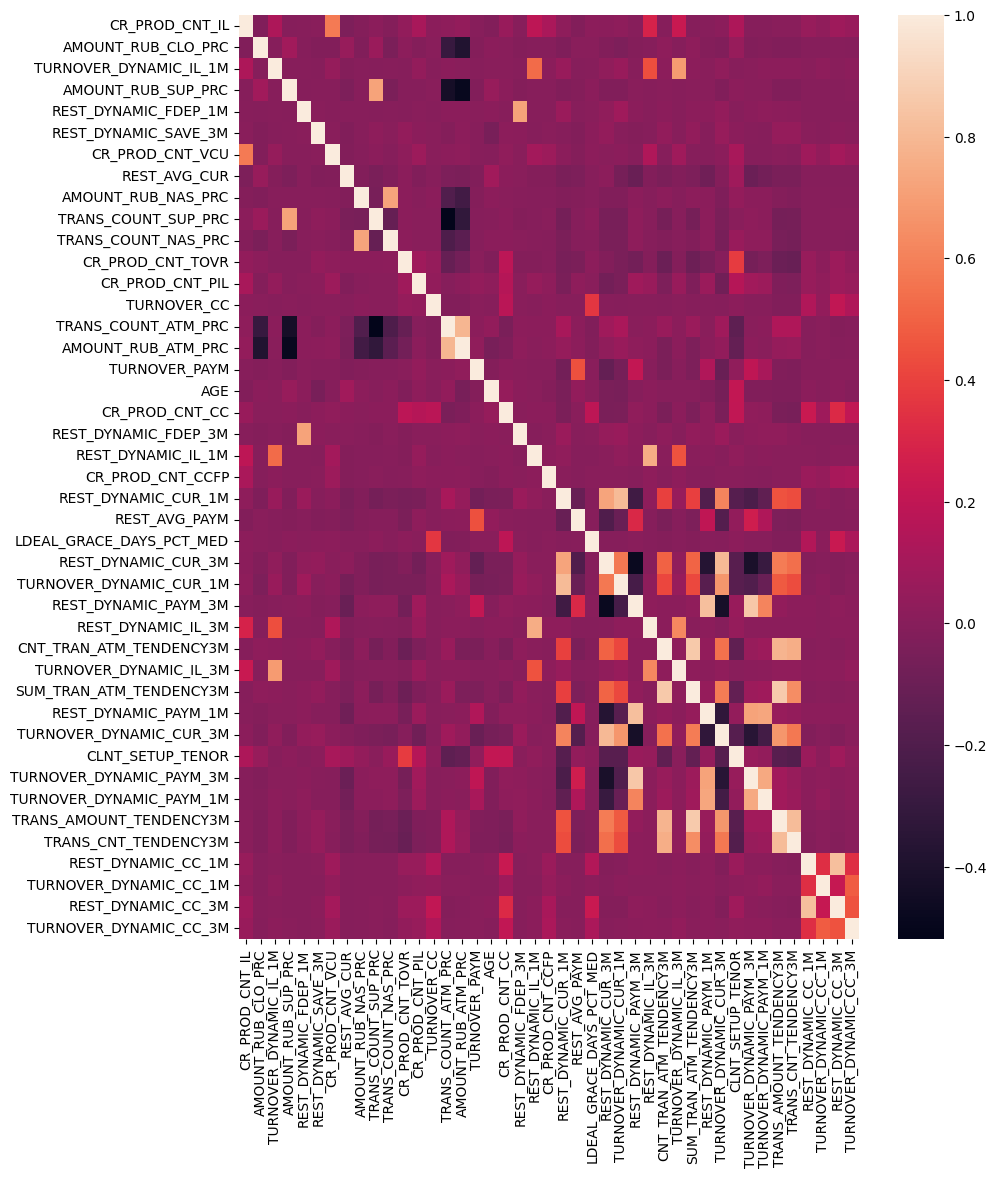

In [219]:
sns.heatmap(data.corr())

In [220]:
def remove_collinear_features(data, threshhold=0.8):
    corr_matrix = data.corr()
    drop_cols = []
    for i in range(len(corr_matrix.columns) - 1):
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            raw = item.index
            val = abs(item.values)
            if val >= threshhold:
                drop_cols.append(col.values[0])
    drop_cols = set(drop_cols)
    data = data.drop(columns=drop_cols)
    return data

In [221]:
data.shape

(355059, 44)

In [222]:
data = remove_collinear_features(data)

In [223]:
data.shape

(355059, 37)

In [224]:
cat_attributes = [col for col in data.columns if data[col].dtype == np.dtype('O')]
num_attributes = [col for col in data.columns if col not in cat_attributes]
print(cat_attributes)
print(num_attributes)

['PACK']
['CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'TURNOVER_DYNAMIC_IL_1M', 'AMOUNT_RUB_SUP_PRC', 'REST_DYNAMIC_FDEP_1M', 'REST_DYNAMIC_SAVE_3M', 'CR_PROD_CNT_VCU', 'REST_AVG_CUR', 'AMOUNT_RUB_NAS_PRC', 'TRANS_COUNT_SUP_PRC', 'TRANS_COUNT_NAS_PRC', 'CR_PROD_CNT_TOVR', 'CR_PROD_CNT_PIL', 'TURNOVER_CC', 'TRANS_COUNT_ATM_PRC', 'AMOUNT_RUB_ATM_PRC', 'TURNOVER_PAYM', 'AGE', 'CR_PROD_CNT_CC', 'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL_1M', 'CR_PROD_CNT_CCFP', 'REST_DYNAMIC_CUR_1M', 'REST_AVG_PAYM', 'LDEAL_GRACE_DAYS_PCT_MED', 'REST_DYNAMIC_CUR_3M', 'REST_DYNAMIC_PAYM_3M', 'REST_DYNAMIC_IL_3M', 'CNT_TRAN_ATM_TENDENCY3M', 'TURNOVER_DYNAMIC_IL_3M', 'CLNT_SETUP_TENOR', 'TURNOVER_DYNAMIC_PAYM_1M', 'TRANS_CNT_TENDENCY3M', 'REST_DYNAMIC_CC_1M', 'TURNOVER_DYNAMIC_CC_1M', 'TURNOVER_DYNAMIC_CC_3M']


In [225]:
packs = data['PACK'].unique()
packs

array(['K01', '102', '105', 'O01', '103', '101', '107', '301', '104',
       '108', '109', 'M01'], dtype=object)

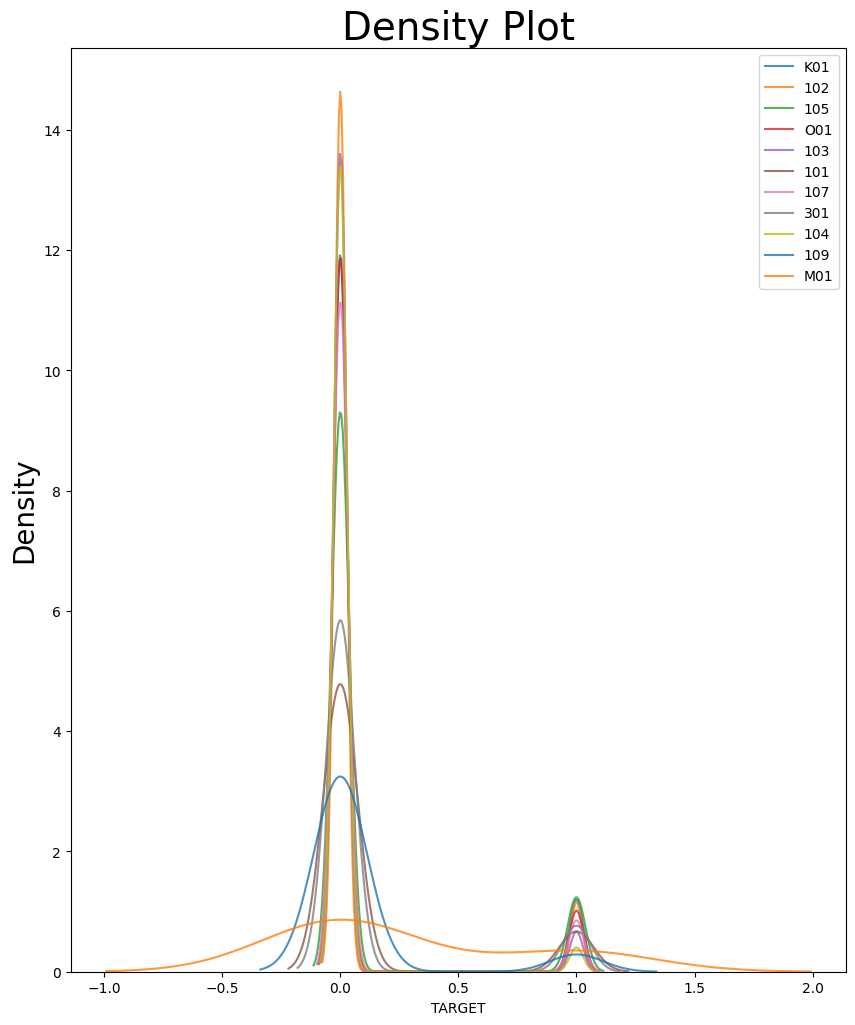

In [226]:
figsize(10, 12)
for pack_type in packs:
    subset = data[data['PACK'] == pack_type].index
    sns.kdeplot(labels[subset], label=pack_type, 
                fill=False, alpha=0.8, warn_singular=False)
plt.ylabel('Density', size=20)
plt.title('Density Plot', size=28)
plt.legend()
None

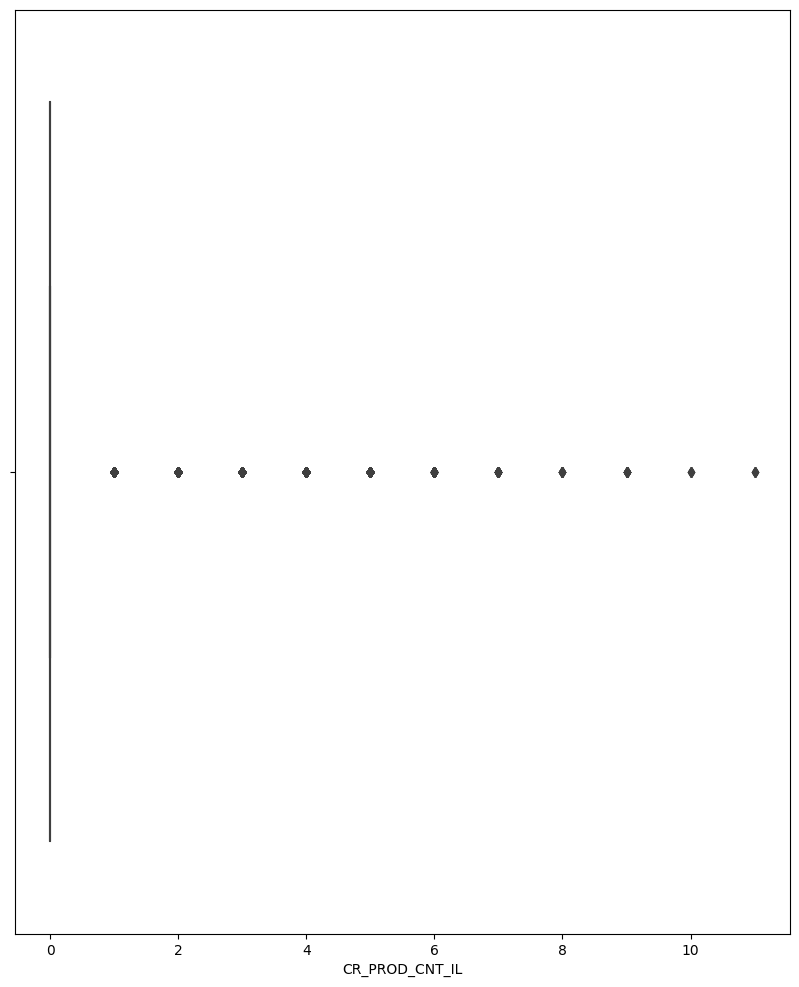

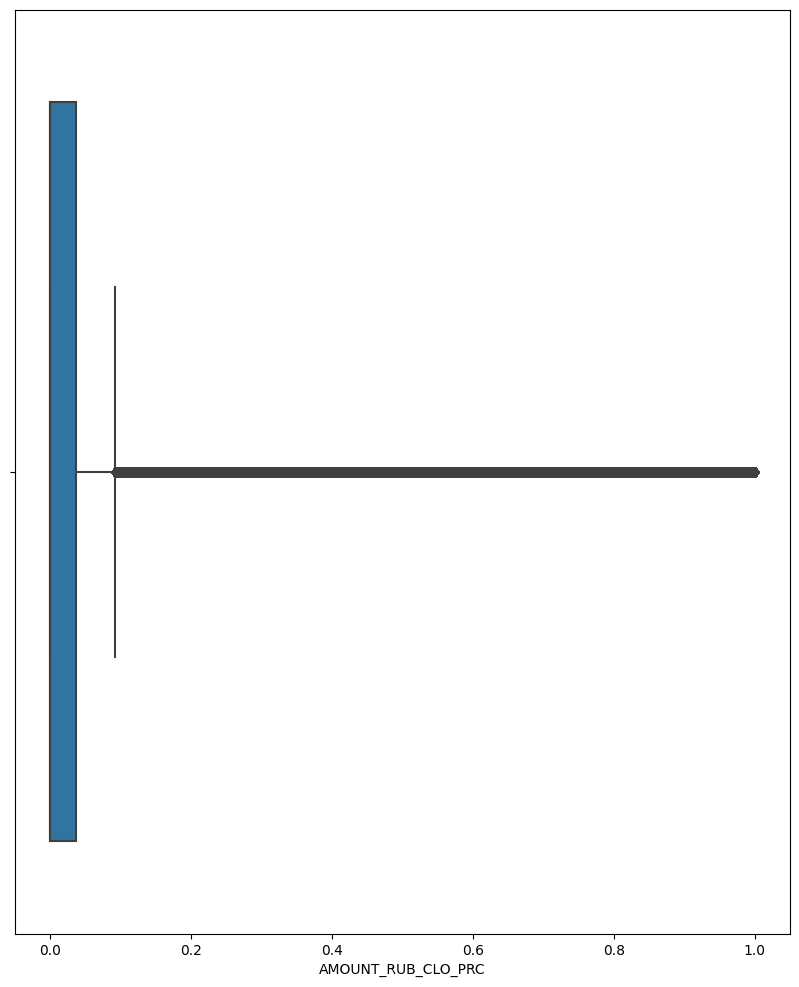

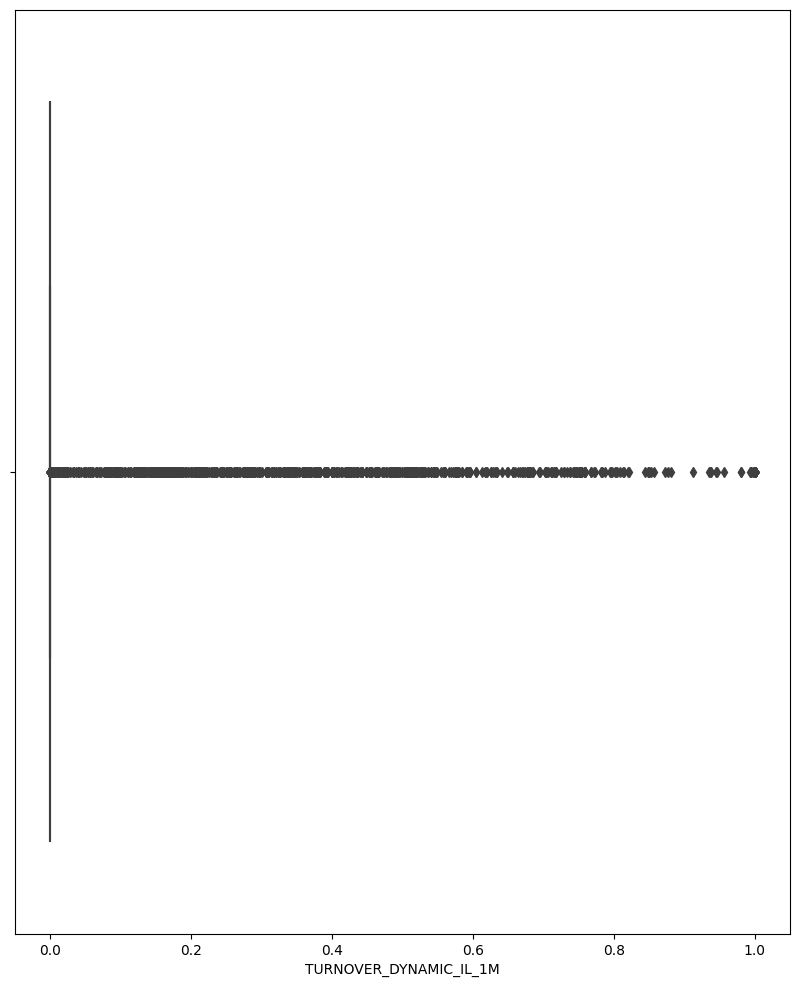

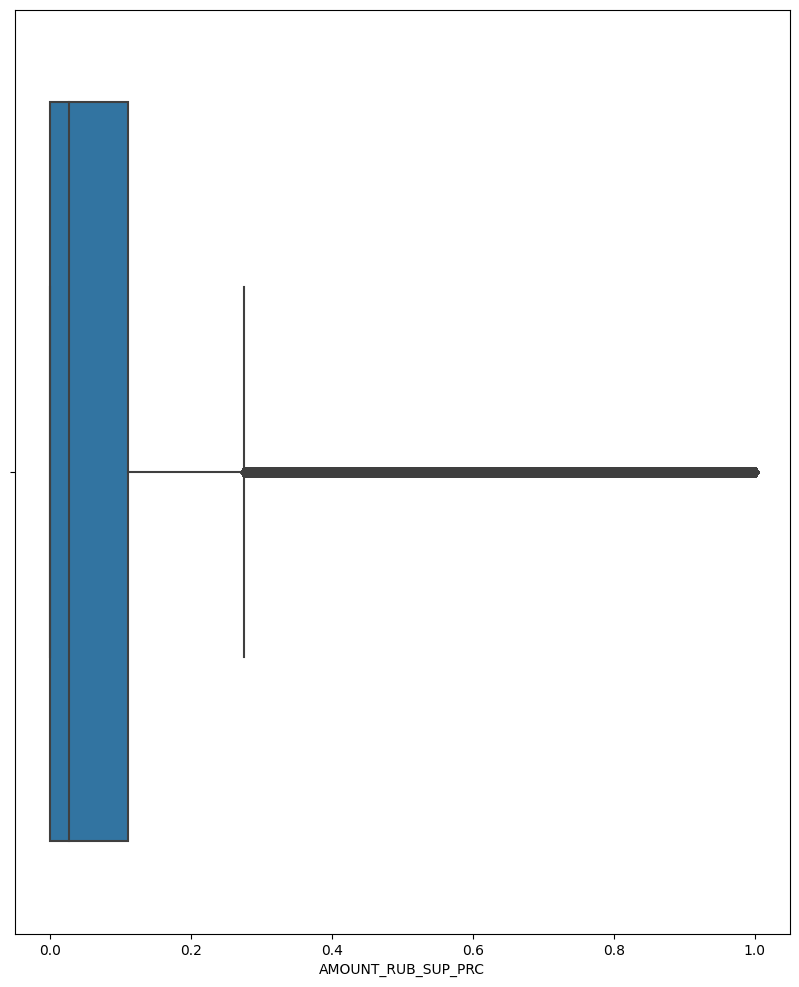

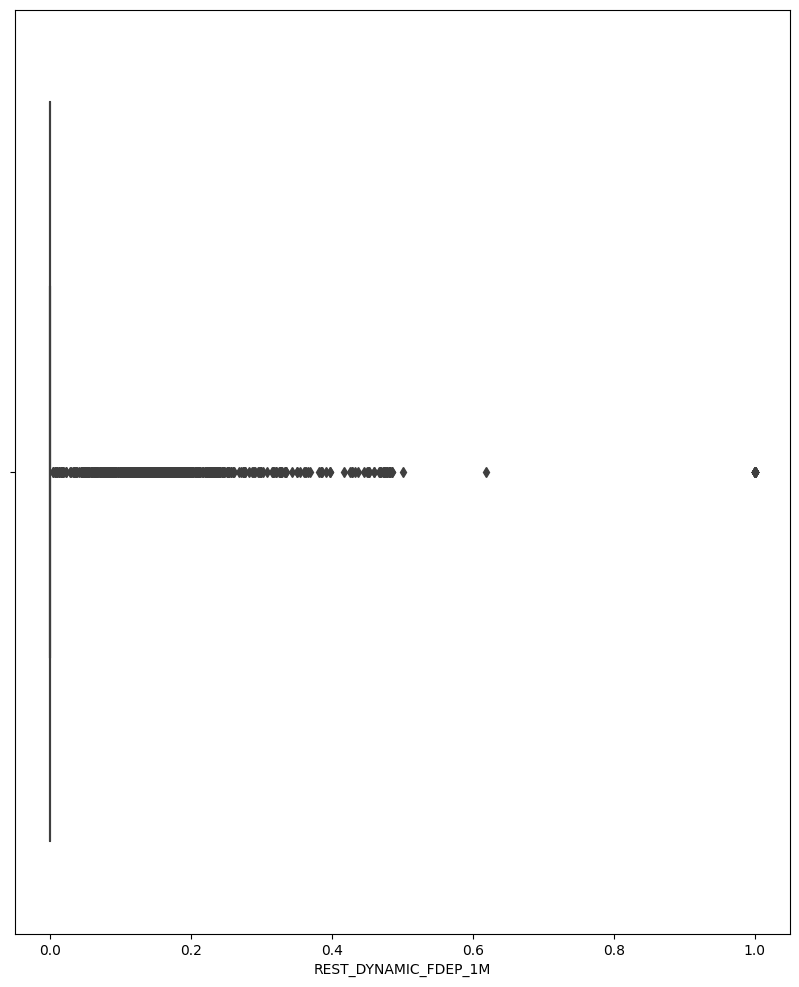

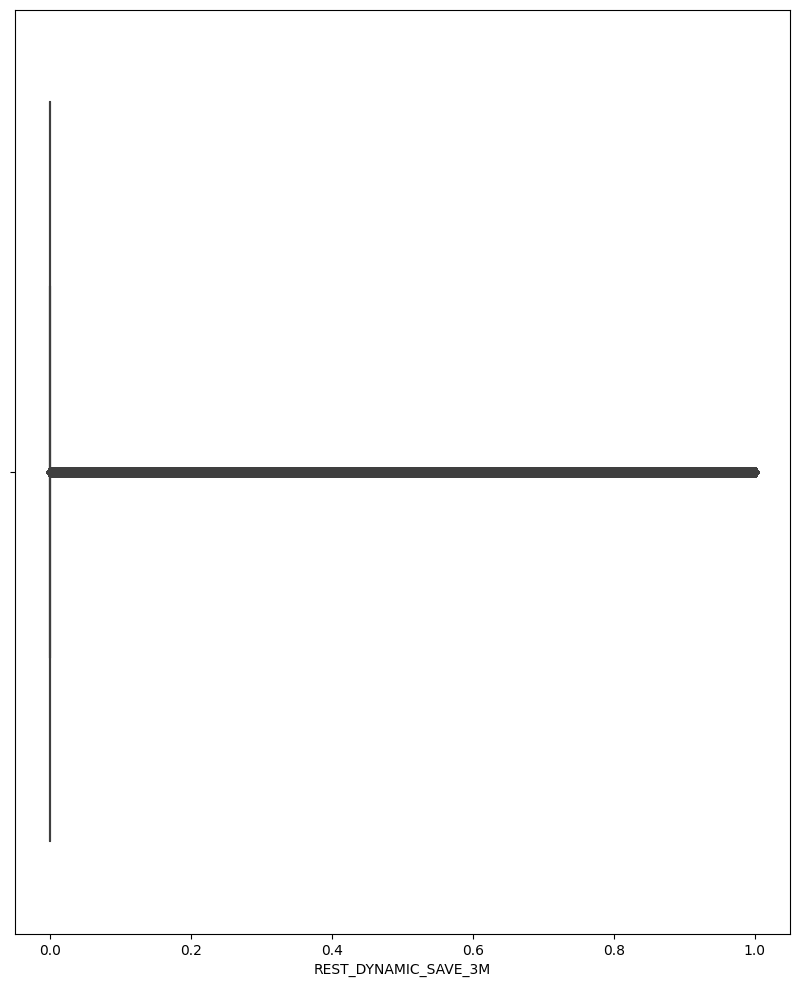

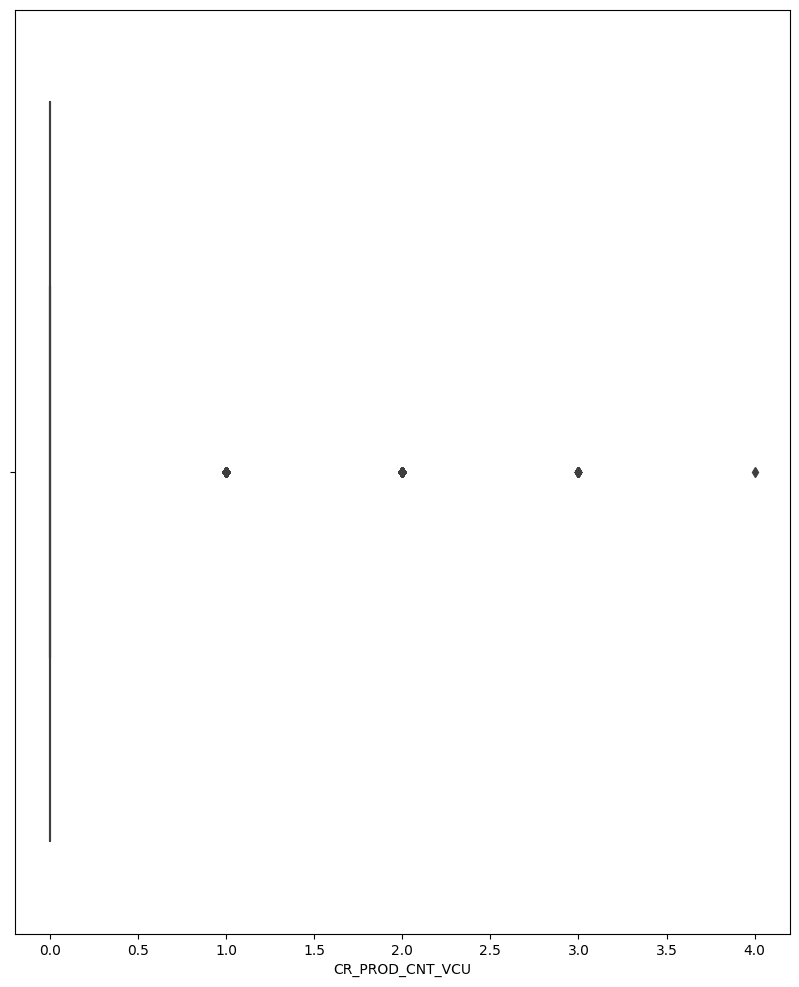

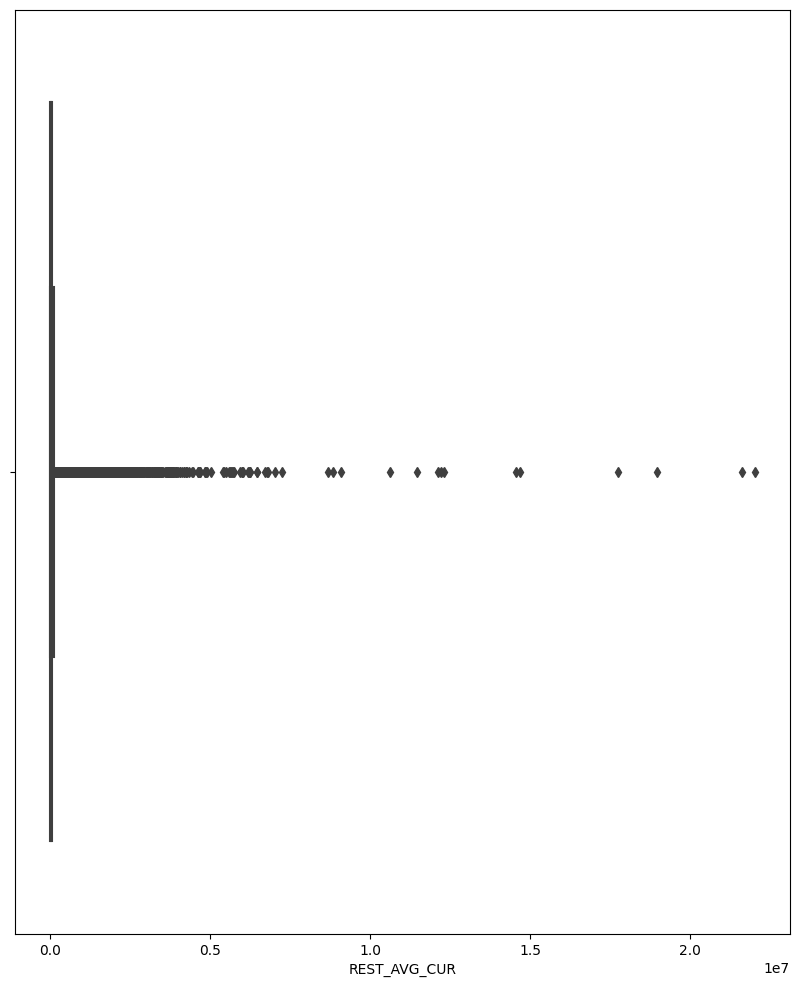

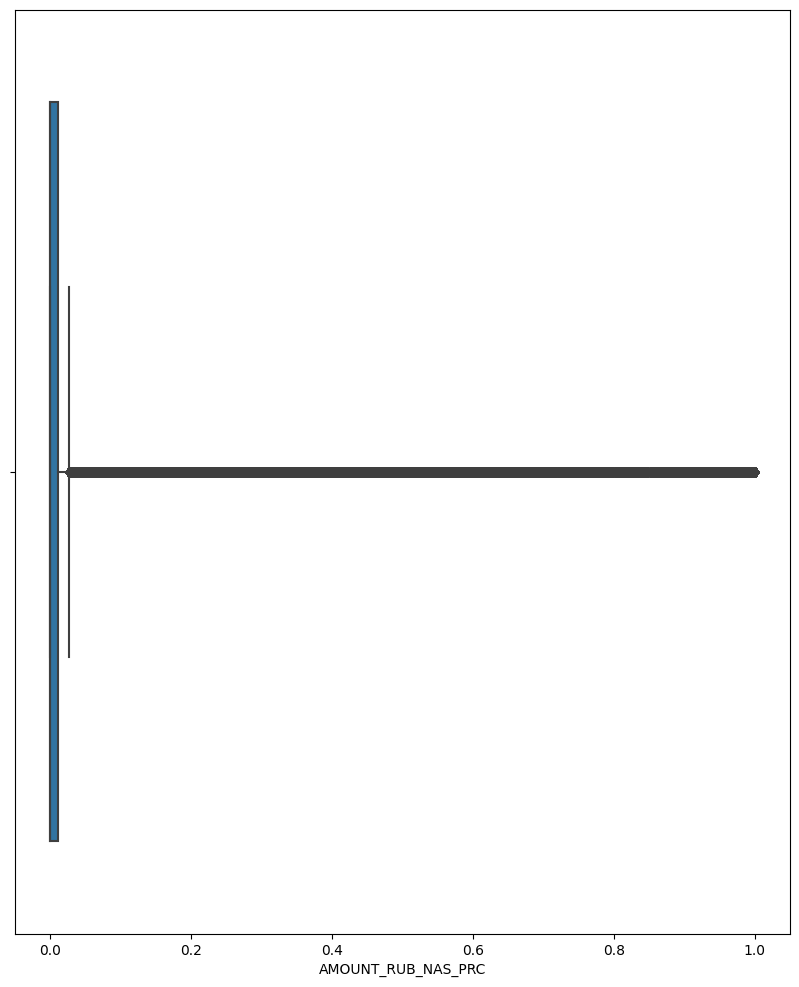

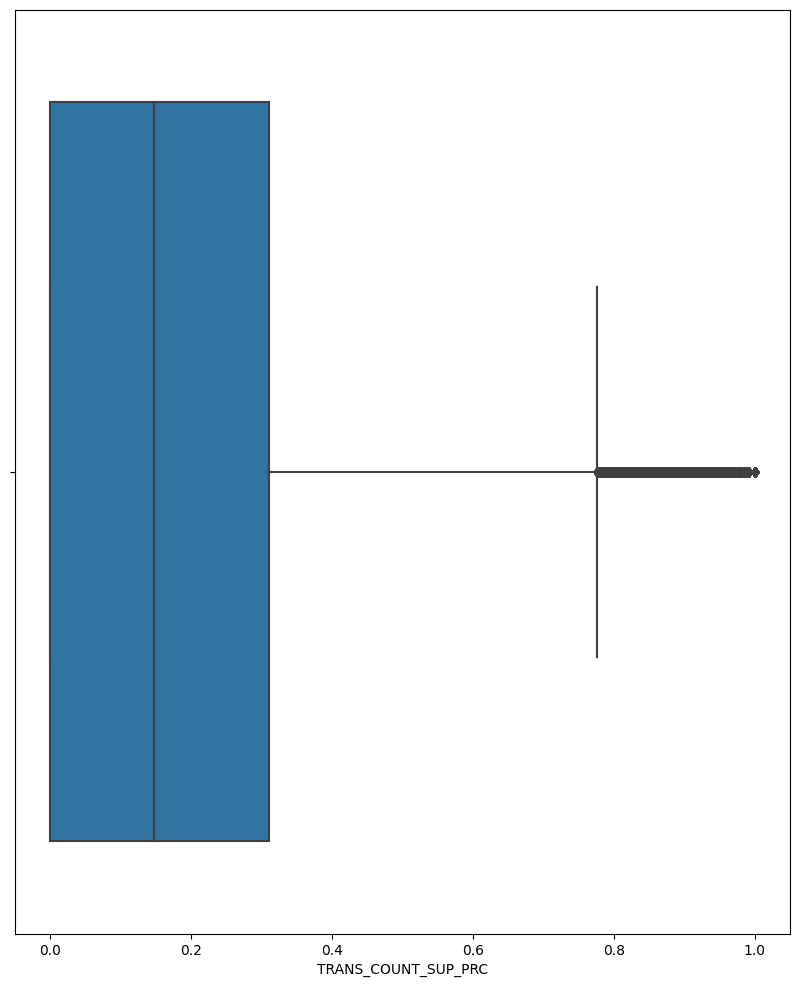

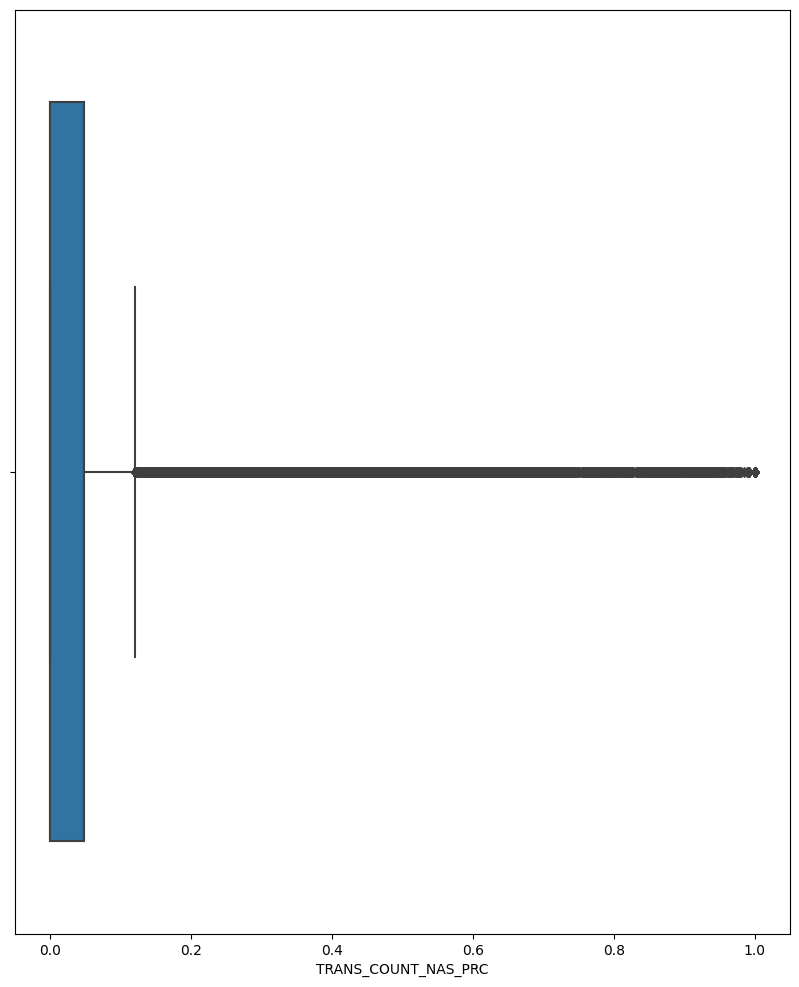

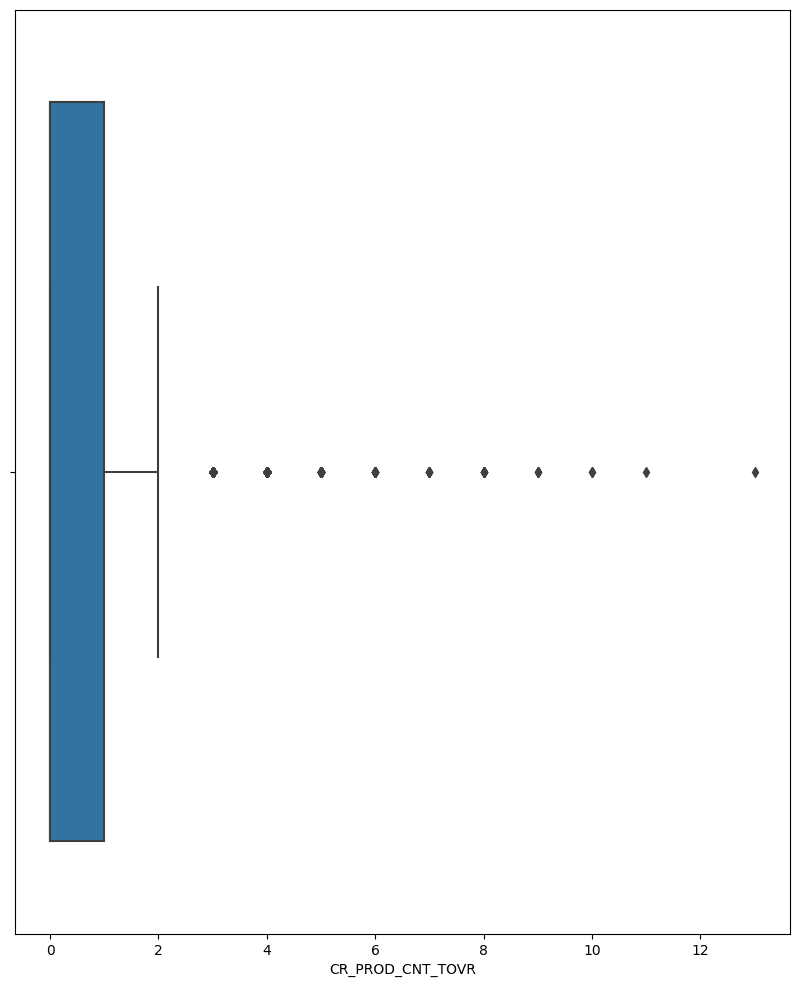

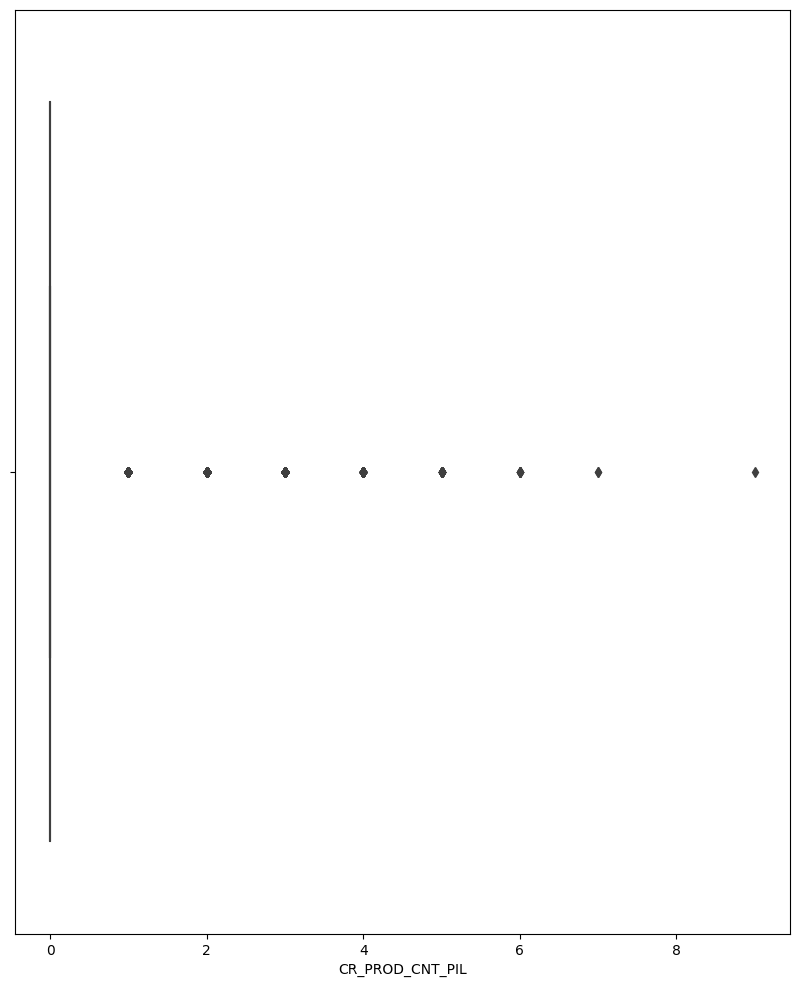

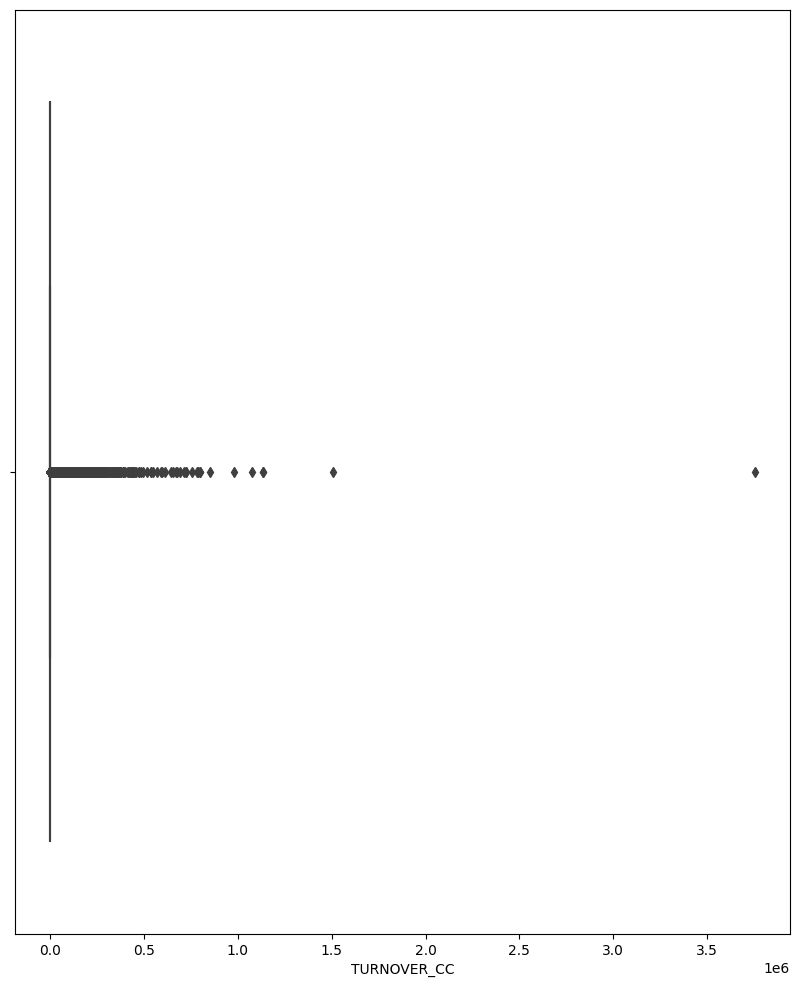

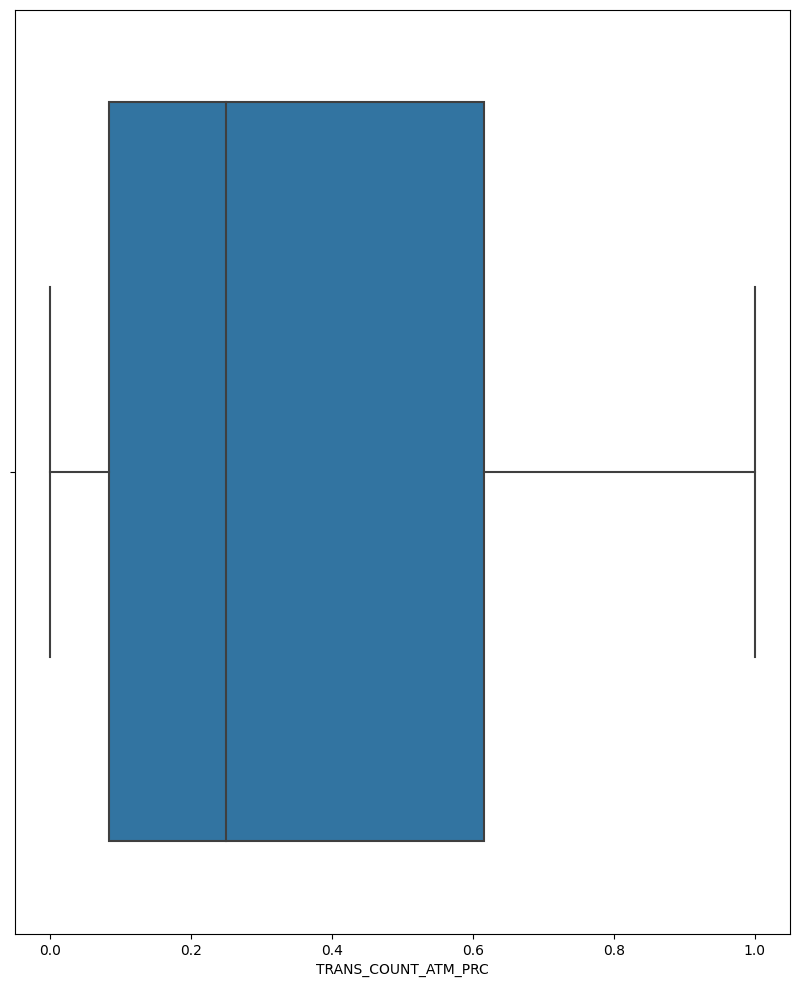

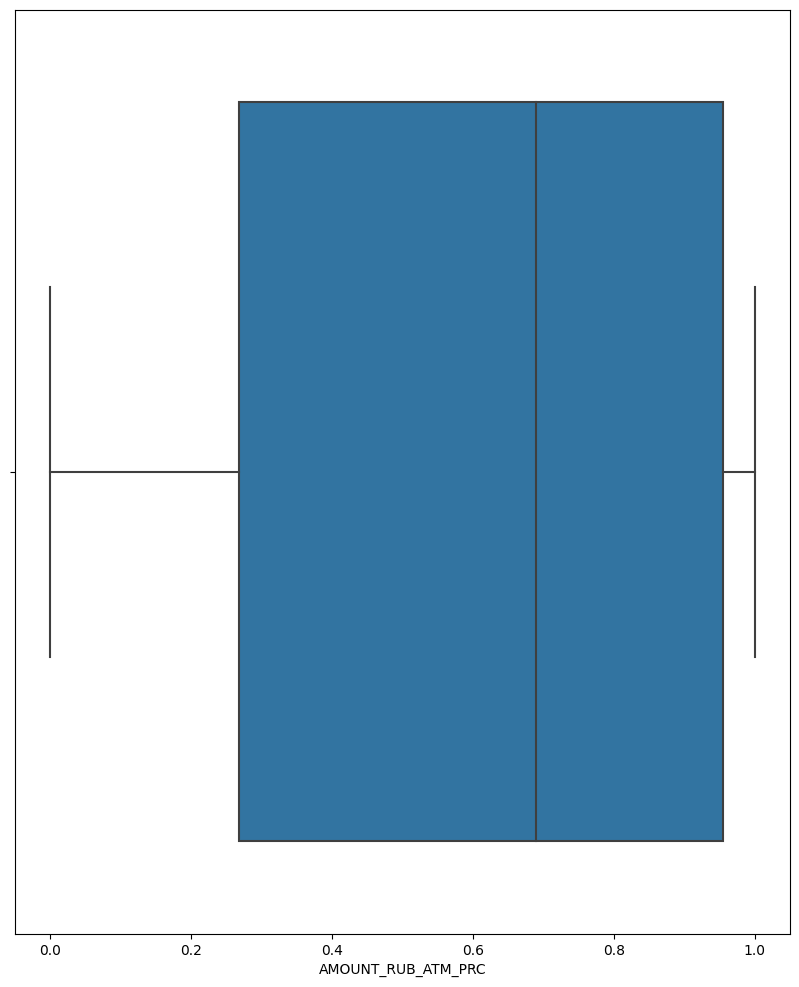

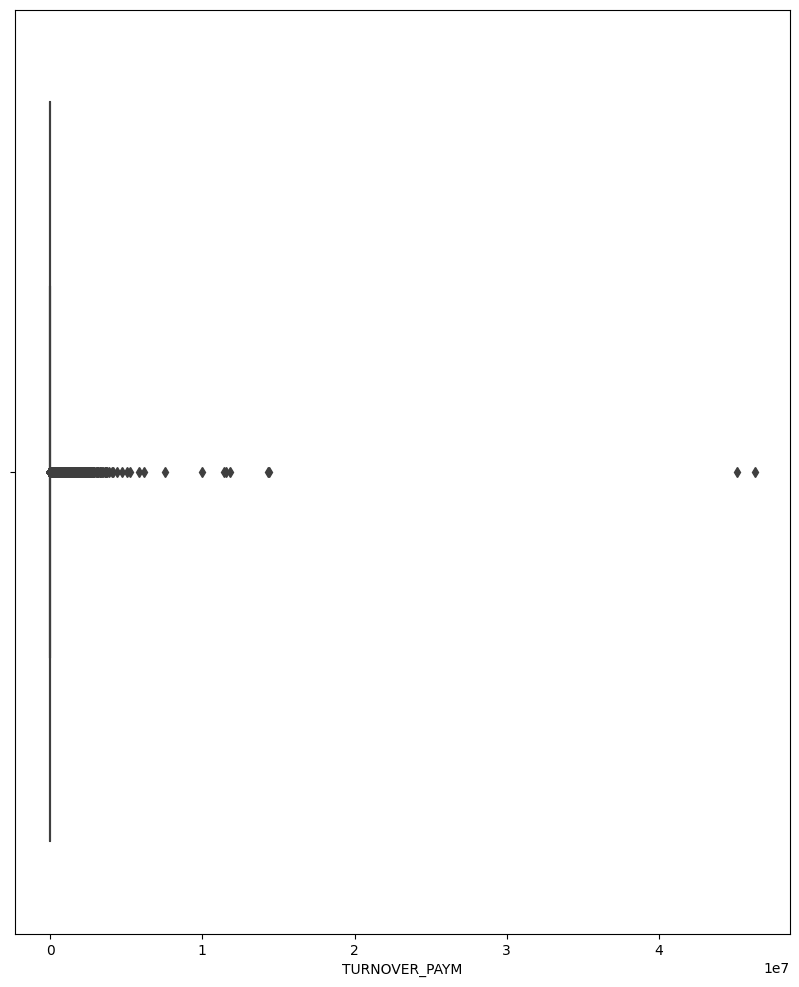

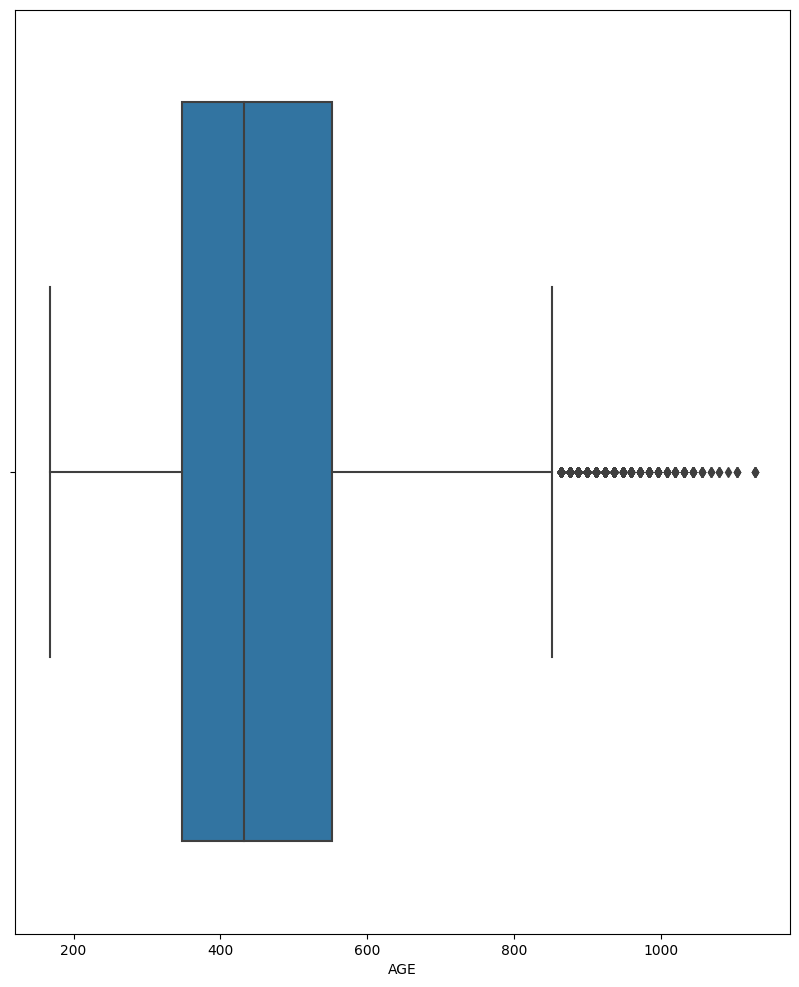

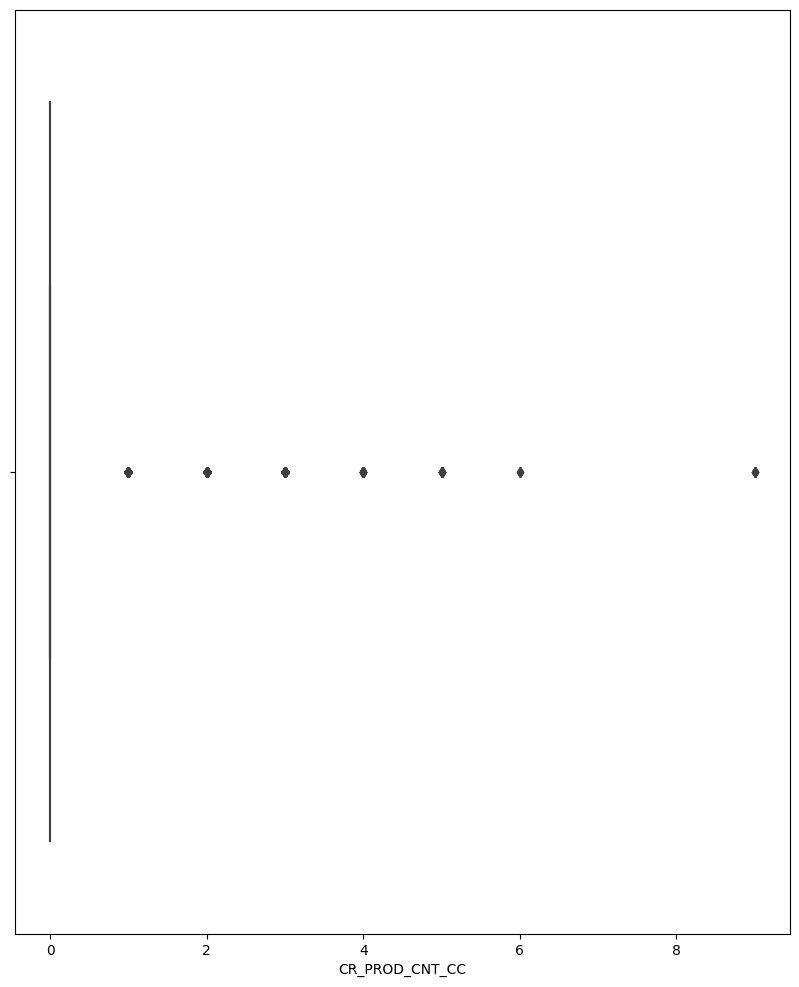

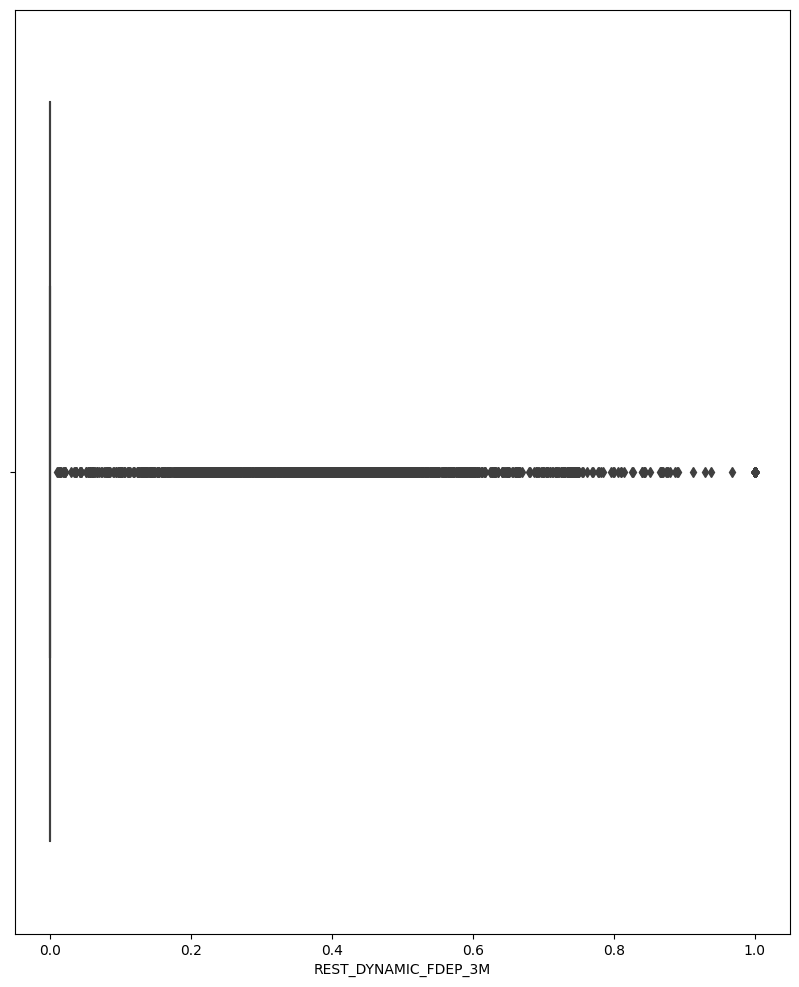

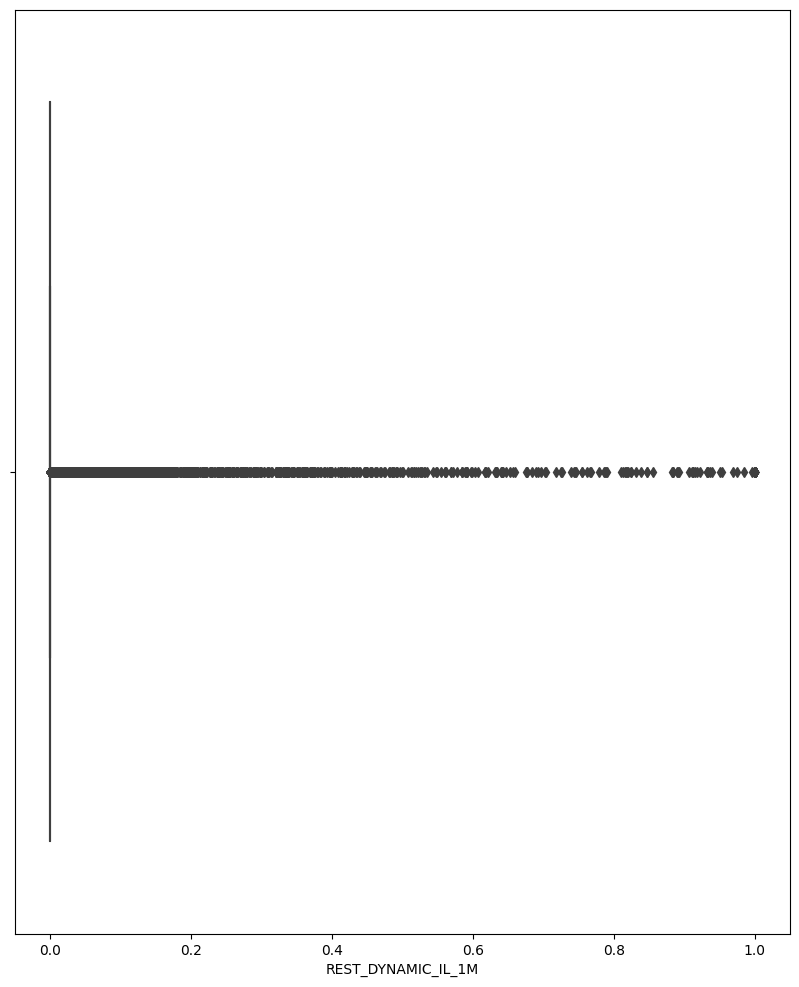

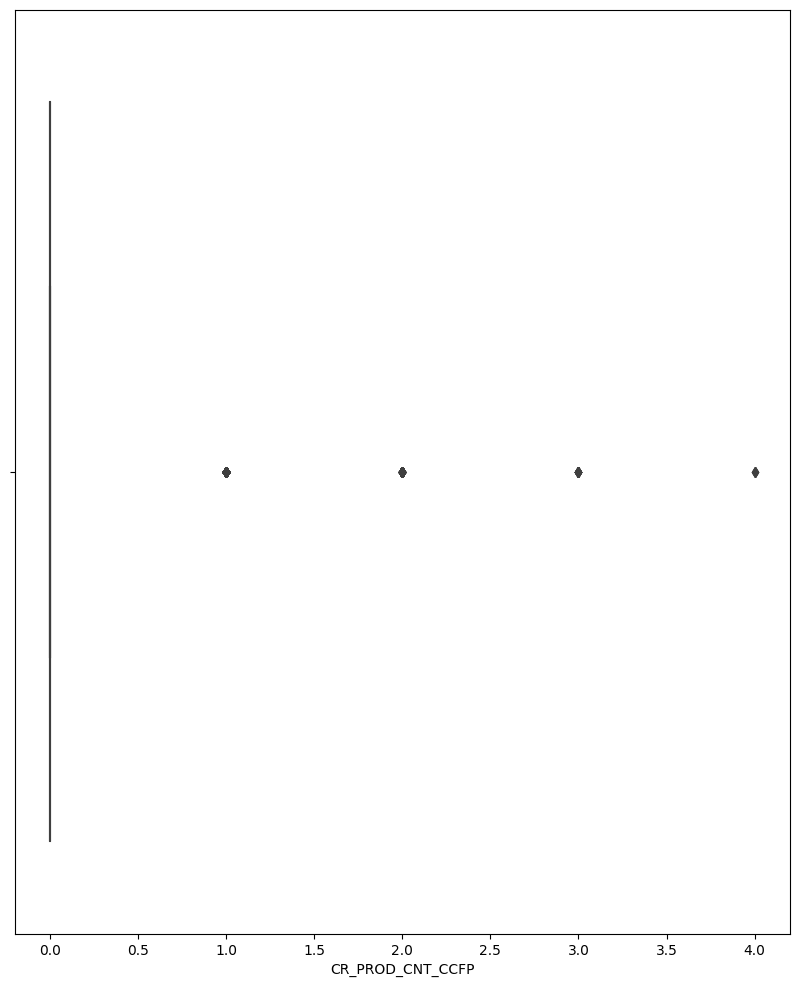

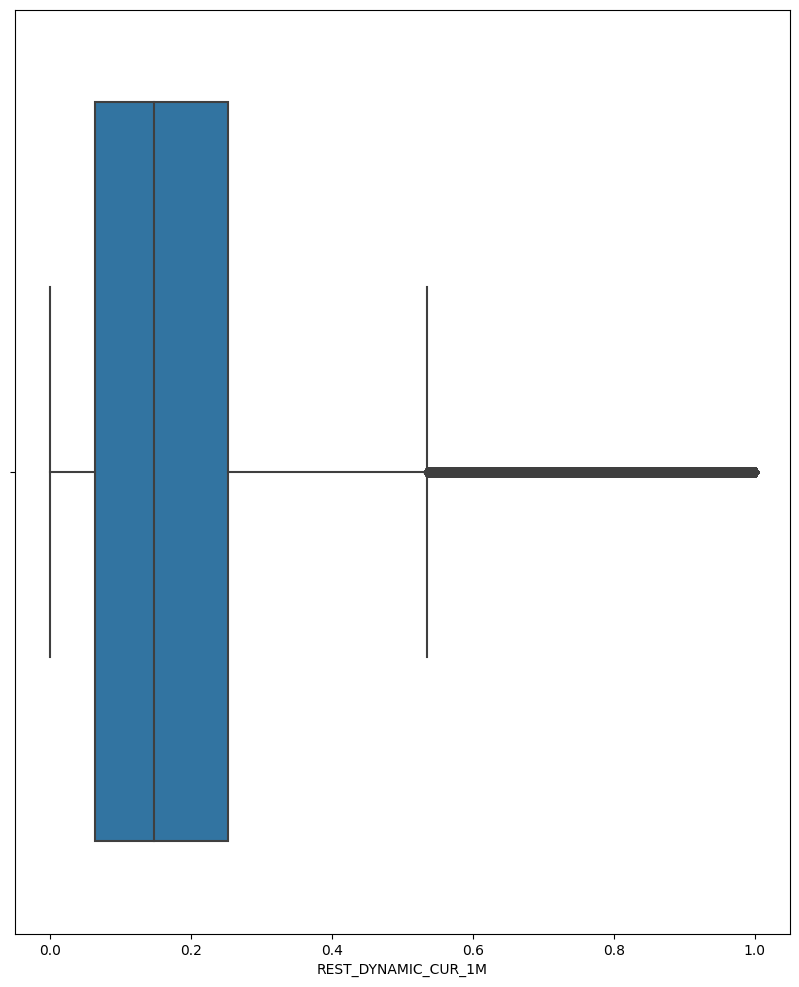

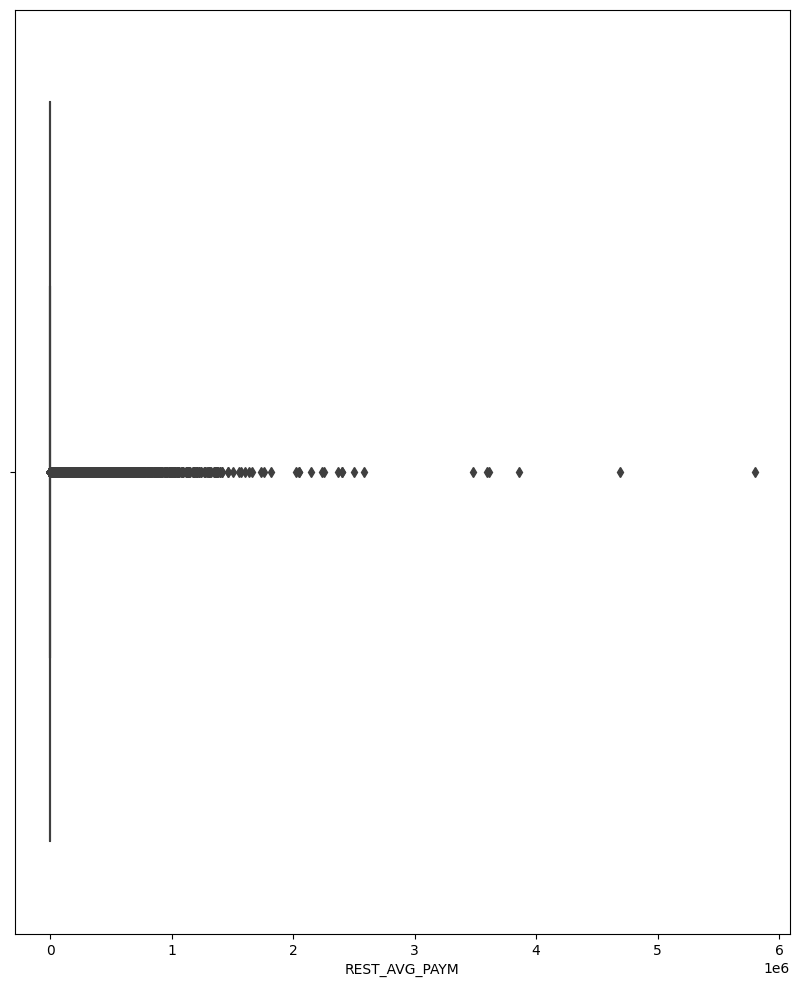

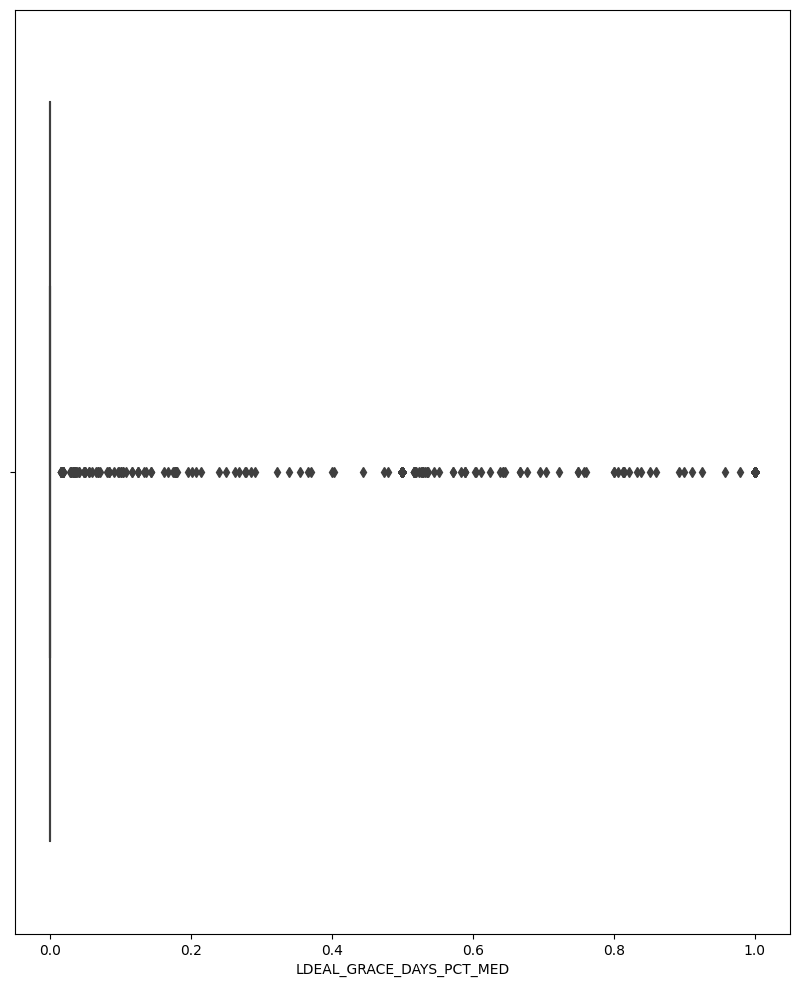

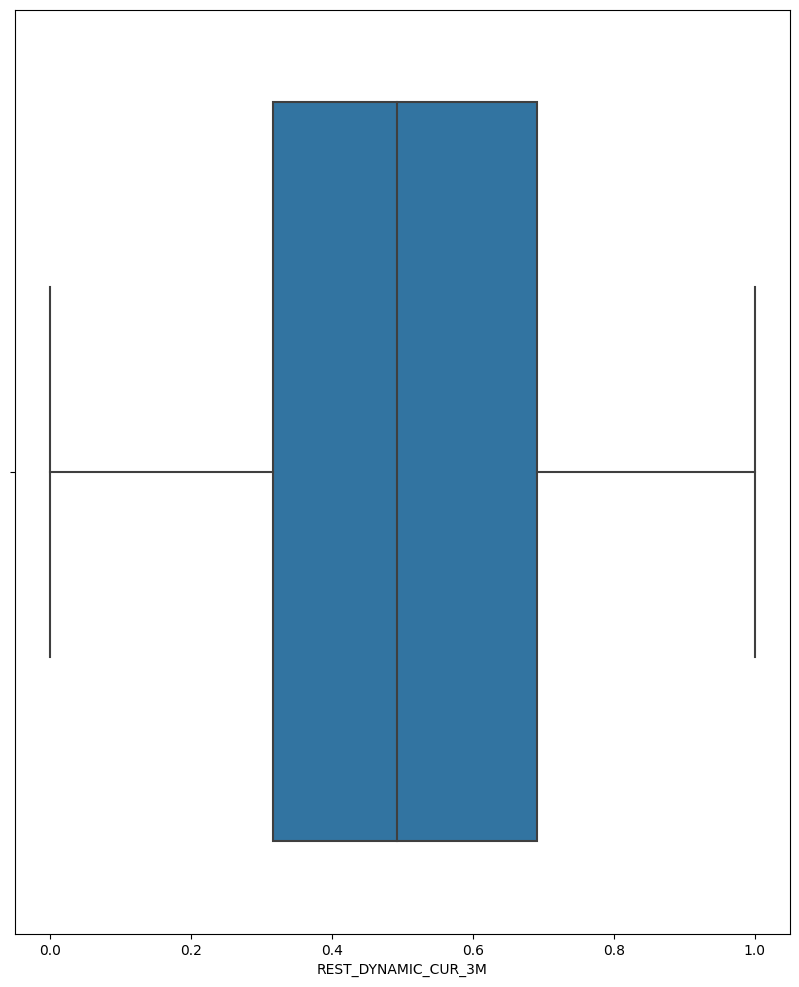

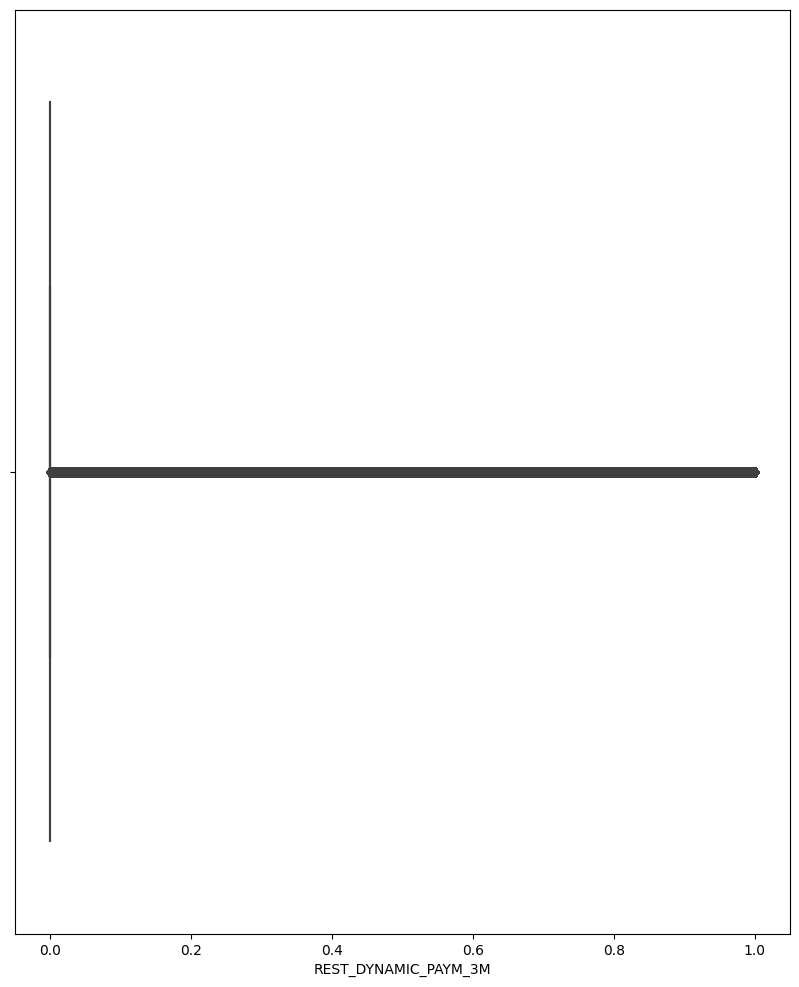

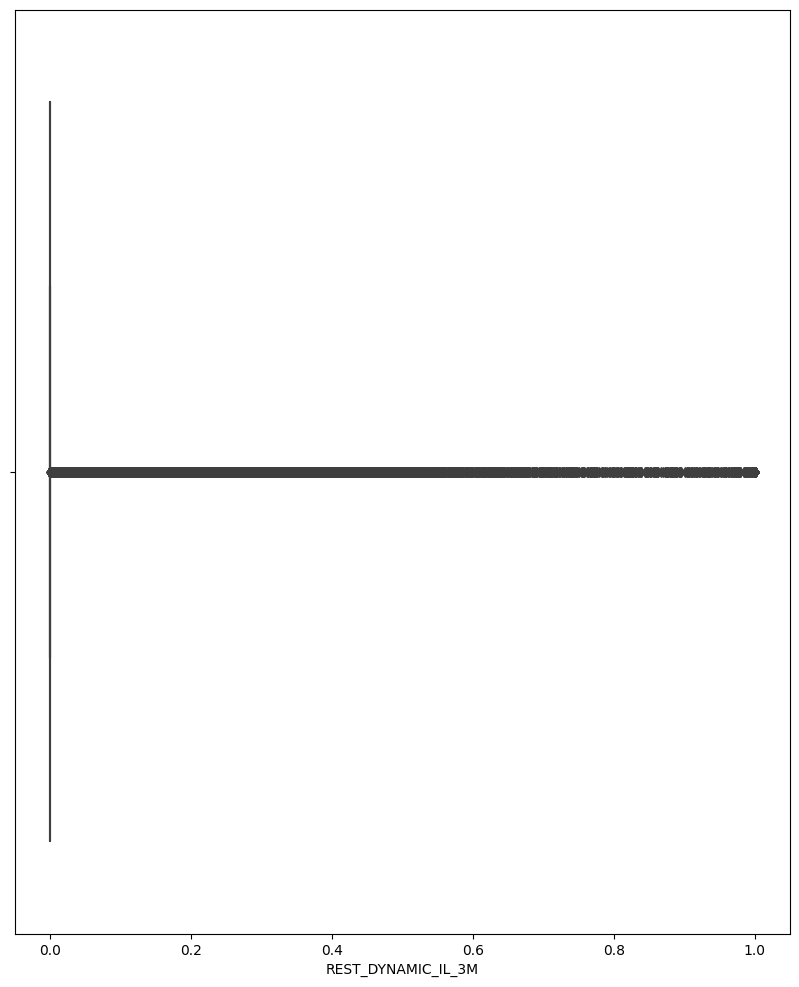

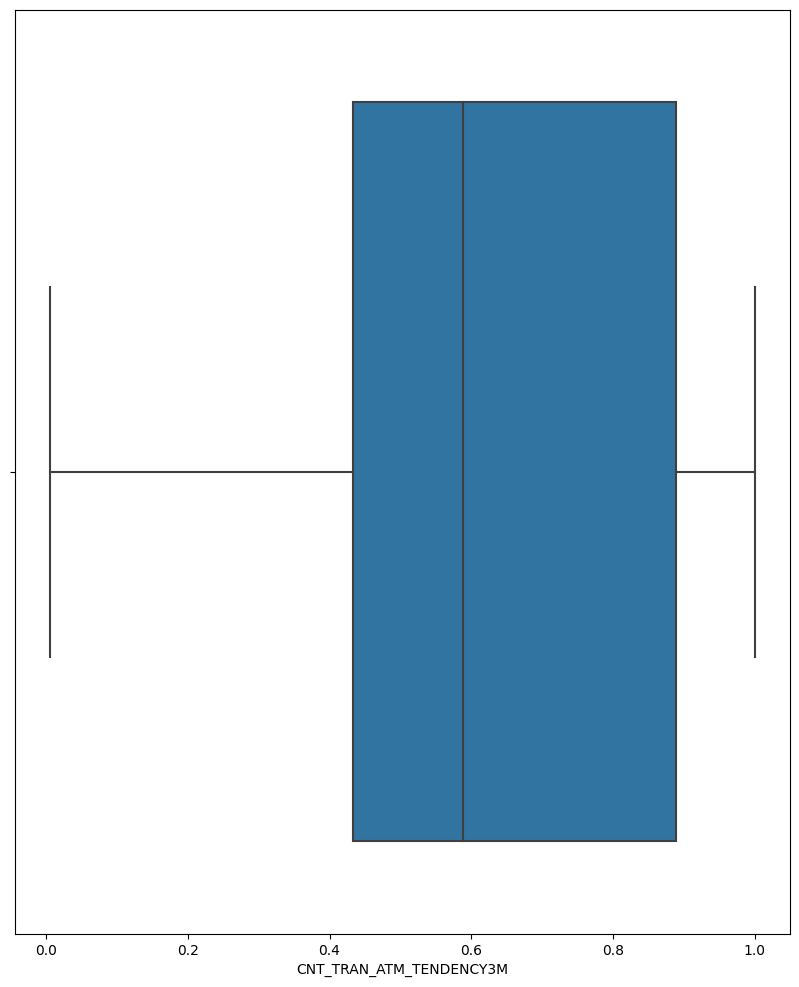

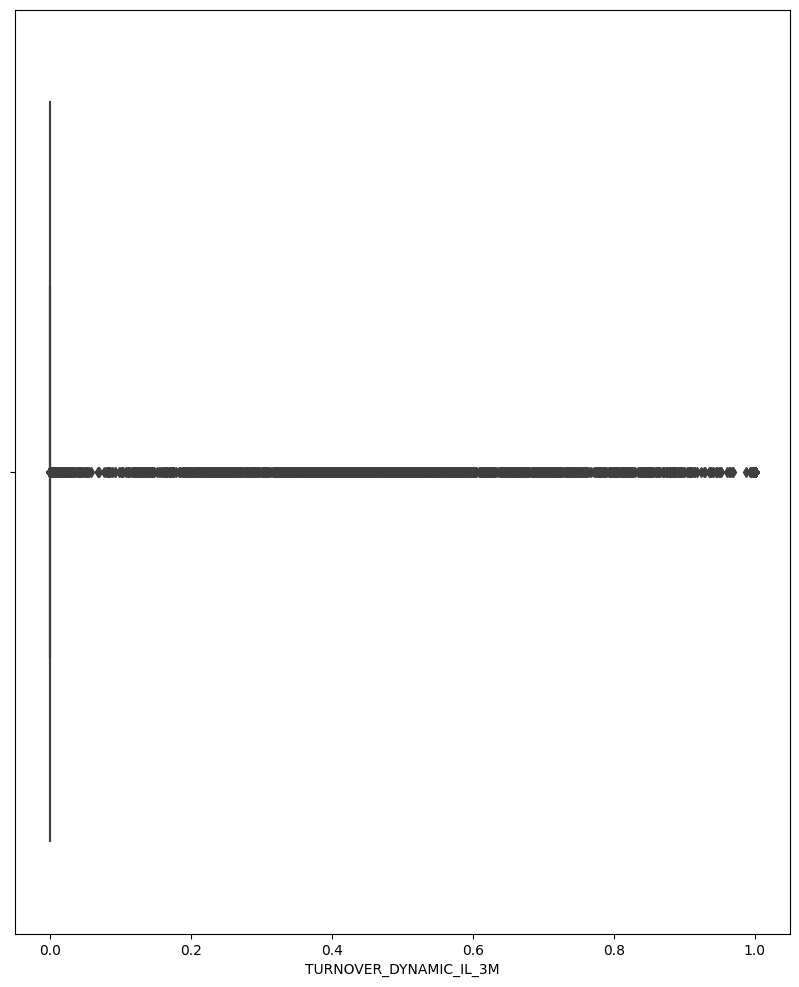

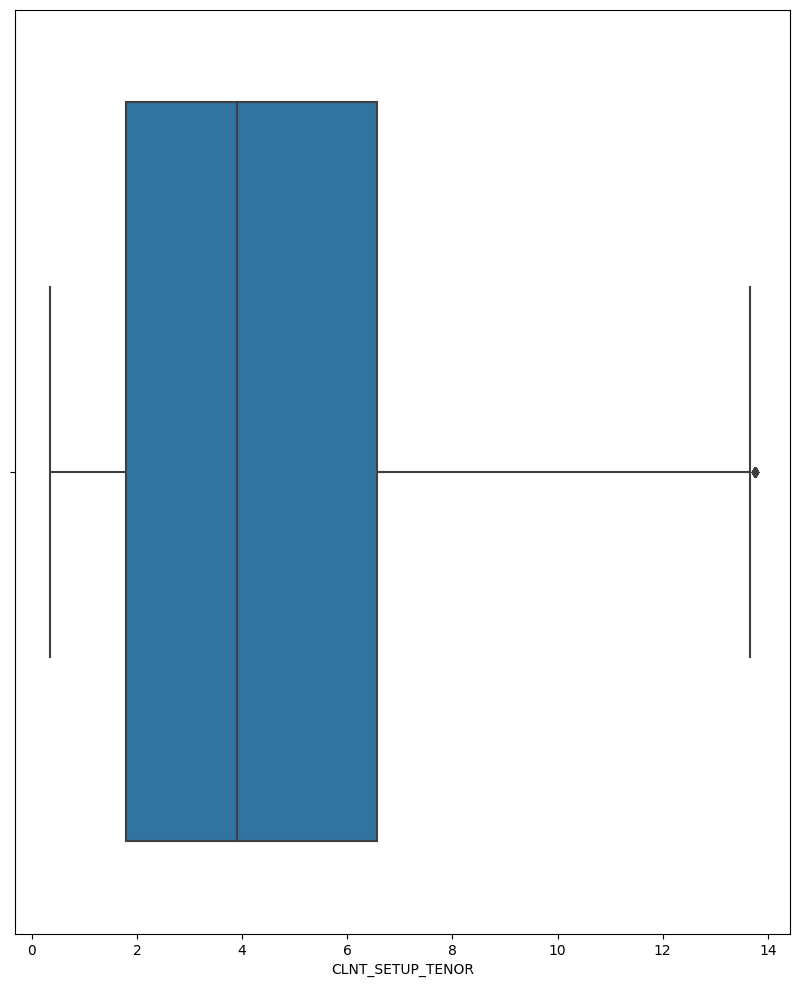

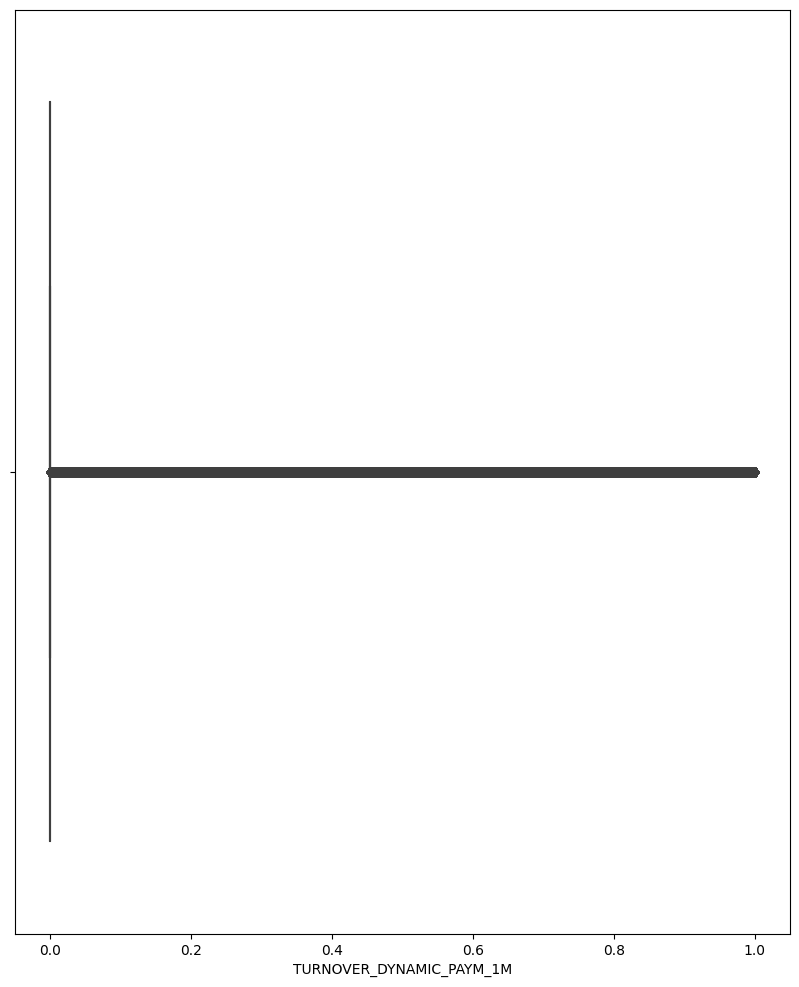

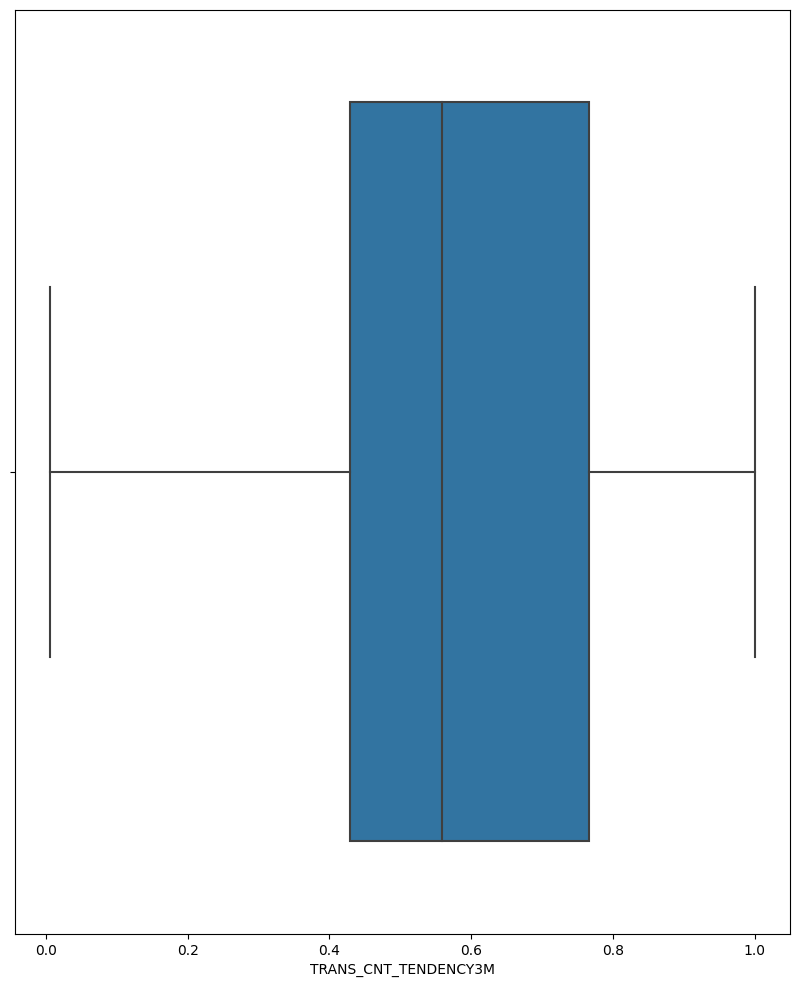

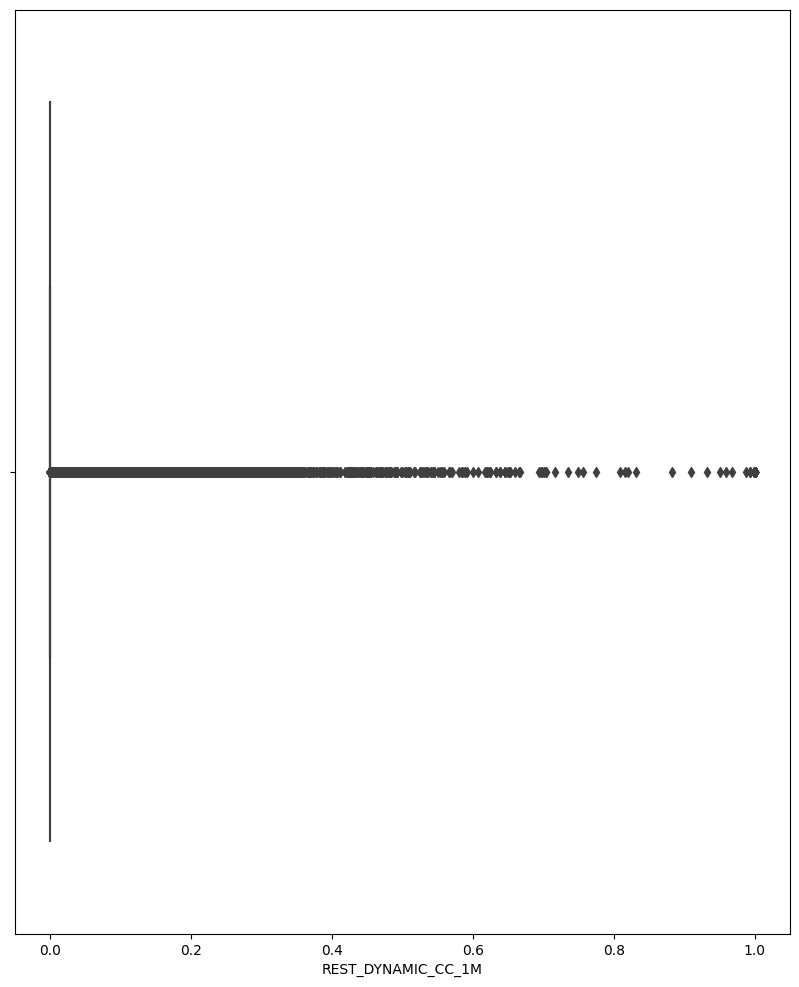

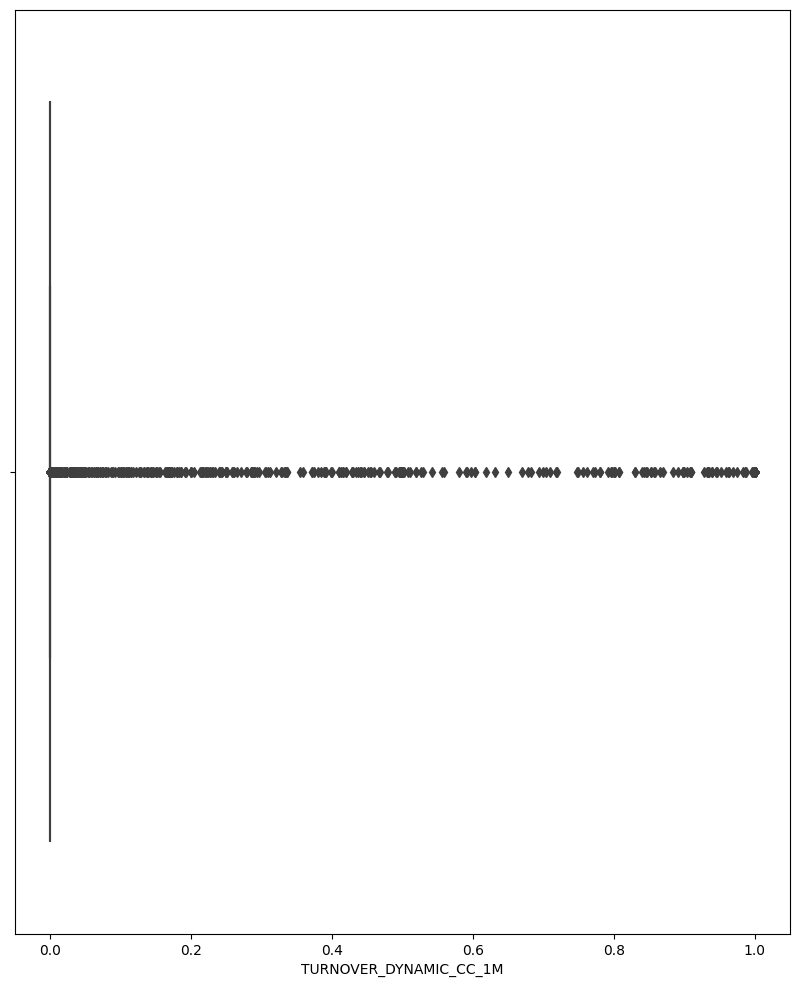

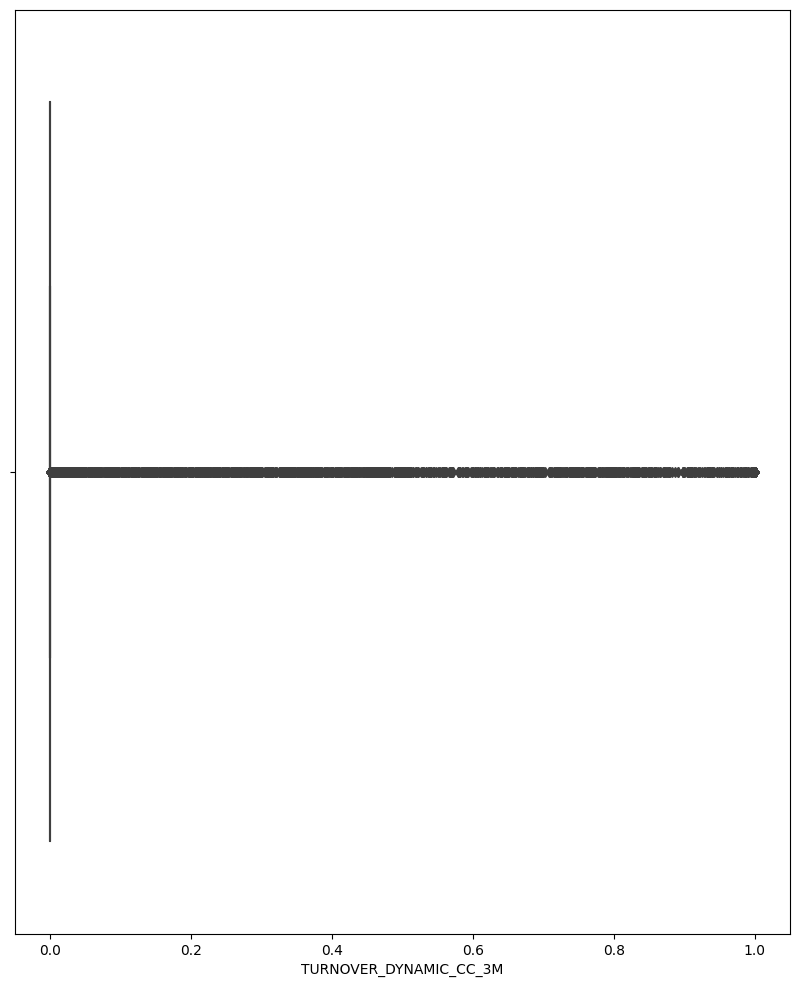

In [227]:
for attr_name in num_attributes:
    sns.boxplot(x=data[attr_name])
    plt.show()

In [228]:
data['AGE'].describe()

count    355059.000000
mean        457.142481
std         136.427566
min         168.000000
25%         348.000000
50%         432.000000
75%         552.000000
max        1128.000000
Name: AGE, dtype: float64

In [229]:
blowouts = ['AGE']
for x in blowouts:
    q75, q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    data.loc[data[x] < min, x] = np.nan
    data.loc[data[x] > max, x] = np.nan

In [230]:
data['REST_AVG_CUR'].describe()

count    3.550590e+05
mean     6.635174e+04
std      1.878545e+05
min      0.000000e+00
25%      4.071982e+03
50%      1.628784e+04
75%      5.659507e+04
max      2.202141e+07
Name: REST_AVG_CUR, dtype: float64

In [231]:
blowouts = ['REST_AVG_CUR']
for x in blowouts:
    q75, q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    data.loc[data[x] < min, x] = np.nan
    data.loc[data[x] > max, x] = np.nan

In [232]:
data['REST_AVG_CUR'].describe()

count    310240.000000
mean      24395.965678
std       30081.812535
min           0.000000
25%        3112.529662
50%       12126.790650
75%       34091.197533
max      135369.914517
Name: REST_AVG_CUR, dtype: float64

In [233]:
blowouts = ['REST_AVG_CUR']
for x in blowouts:
    q75, q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    data.loc[data[x] < min, x] = np.nan
    data.loc[data[x] > max, x] = np.nan

In [234]:
data.isna().sum()

CR_PROD_CNT_IL                  0
AMOUNT_RUB_CLO_PRC          38198
TURNOVER_DYNAMIC_IL_1M          0
AMOUNT_RUB_SUP_PRC          38198
REST_DYNAMIC_FDEP_1M            0
REST_DYNAMIC_SAVE_3M            0
CR_PROD_CNT_VCU                 0
REST_AVG_CUR                44819
AMOUNT_RUB_NAS_PRC          38198
TRANS_COUNT_SUP_PRC         38198
TRANS_COUNT_NAS_PRC         38198
CR_PROD_CNT_TOVR                0
CR_PROD_CNT_PIL                 0
TURNOVER_CC                     0
TRANS_COUNT_ATM_PRC         38198
AMOUNT_RUB_ATM_PRC          38198
TURNOVER_PAYM                   0
AGE                          1832
CR_PROD_CNT_CC                  0
REST_DYNAMIC_FDEP_3M            0
REST_DYNAMIC_IL_1M              0
CR_PROD_CNT_CCFP                0
REST_DYNAMIC_CUR_1M             0
REST_AVG_PAYM                   0
LDEAL_GRACE_DAYS_PCT_MED        0
REST_DYNAMIC_CUR_3M             0
REST_DYNAMIC_PAYM_3M            0
REST_DYNAMIC_IL_3M              0
CNT_TRAN_ATM_TENDENCY3M     99470
TURNOVER_DYNAM

In [235]:
data.shape

(355059, 37)

In [236]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', SimpleImputer()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [237]:
data_prep = full_pipeline.fit_transform(data)
data_prep = data_prep.toarray()
data_prep.shape

(355059, 48)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(data_prep, labels, test_size=0.2, random_state=42,
                                                    stratify=labels)

In [245]:
clf = Sequential()
clf.add(Dense(64, input_shape=(data_prep.shape[1],), activation='relu'))
clf.add(BatchNormalization())
clf.add(Dense(128, activation='relu'))
clf.add(BatchNormalization())
clf.add(Dense(64, activation='relu'))
clf.add(BatchNormalization())
clf.add(Dense(32, activation='relu'))
clf.add(BatchNormalization())
clf.add(Dense(1, activation='sigmoid'))
clf.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 64)                3136      
                                                                 
 batch_normalization_53 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_66 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_54 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_55 (Bat  (None, 64)             

In [246]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-4,
    decay_steps=1000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-3)

In [247]:
clf.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(),
            metrics=[keras.metrics.AUC()])

In [248]:
clf.fit(X_train, y_train, epochs=100, use_multiprocessing=True)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8877/8877 [==============================] - 15s 2ms/step - loss: 0.2523 - auc_14: 0.7521
Epoch 2/100
8877/8877 [==============================] - 15s 2ms/step - loss: 0.2408 - auc_14: 0.7867
Epoch 3/100
8877/8877 [==============================] - 16s 2ms/step - loss: 0.2384 - auc_14: 0.7941
Epoch 4/100
8877/8877 [==============================] - 16s 2ms/step - 

8877/8877 [==============================] - 11s 1ms/step - loss: 0.2212 - auc_14: 0.8373
Epoch 72/100
8877/8877 [==============================] - 9s 1000us/step - loss: 0.2210 - auc_14: 0.8377
Epoch 73/100
8877/8877 [==============================] - 14s 2ms/step - loss: 0.2211 - auc_14: 0.8375
Epoch 74/100
8877/8877 [==============================] - 16s 2ms/step - loss: 0.2207 - auc_14: 0.8384
Epoch 75/100
8877/8877 [==============================] - 9s 1ms/step - loss: 0.2210 - auc_14: 0.8377
Epoch 76/100
8877/8877 [==============================] - 12s 1ms/step - loss: 0.2209 - auc_14: 0.8381
Epoch 77/100
8877/8877 [==============================] - 13s 2ms/step - loss: 0.2207 - auc_14: 0.8382
Epoch 78/100
8877/8877 [==============================] - 16s 2ms/step - loss: 0.2202 - auc_14: 0.8394
Epoch 79/100
8877/8877 [==============================] - 16s 2ms/step - loss: 0.2204 - auc_14: 0.8390
Epoch 80/100
8877/8877 [==============================] - 16s 2ms/step - loss: 0.2202

In [251]:
predict = clf.predict(X_test)

2220/2220 [==============================] - 1s 602us/step


In [252]:
fpr, tpr, thresholds = roc_curve(y_test.values, predict)
auc(fpr, tpr)

0.8084453295689442